In [33]:
from HeaderP import *
from scipy.interpolate import interp1d

def getcolor(vrange,cm='plasma'):
    cmap = plt.cm.get_cmap(cm)
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

# Simulation Part

In [34]:
df = pd.read_csv('g2.79e12_fehscatter_simdata.csv')
df_afe =  pd.read_csv('g2.79e12_ohscatter_simdata.csv')
ismslope = pd.read_pickle('../NIHAORbirth/ISM_slope_g279e12.pkl')
m2pattern = pd.read_pickle('ISM_slope_g279e12.pkl')
merger = pd.read_pickle('./g2.79e12_merger_Lucy.dat')
df_HESTIA = pd.read_csv('HESTIA.csv')

mergertimes = 13.8-merger['time']
mergervir = merger['vir_ratio']

agebin=np.linspace(0,16,17)
mass_ave = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes>agebin[i])&(mergertimes<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave[i] = 0
    else:
        mass_ave[i] = sum(mergervir[m])

        
df_nobar = pd.read_csv('g7.55e11_fehscatter_simdata.csv')
ismslope_nobar = pd.read_pickle('../NIHAORbirth/ISM_slope_g755e11.pkl')
m2pattern_nobar = pd.read_pickle('ISM_slope_g755e11.pkl')
merger_nobar = pd.read_pickle('./g7.55e11_merger_Lucy.dat')

mergertimes_nobar = 13.8-np.array(merger_nobar['time'],dtype=float)
mergervir_nobar = np.array(merger_nobar['vir_ratio'],dtype=float)


mass_ave_nobar = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes_nobar>agebin[i])&(mergertimes_nobar<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave_nobar[i] = 0
    else:
        mass_ave_nobar[i] = sum(mergervir_nobar[m])/sum(m)
        

11
(-0.9707867220794305, 6.986508734530631e-07)
0.10913930845557952
11
(-0.9714664450241869, 6.290391228801466e-07)
61.81263967569357


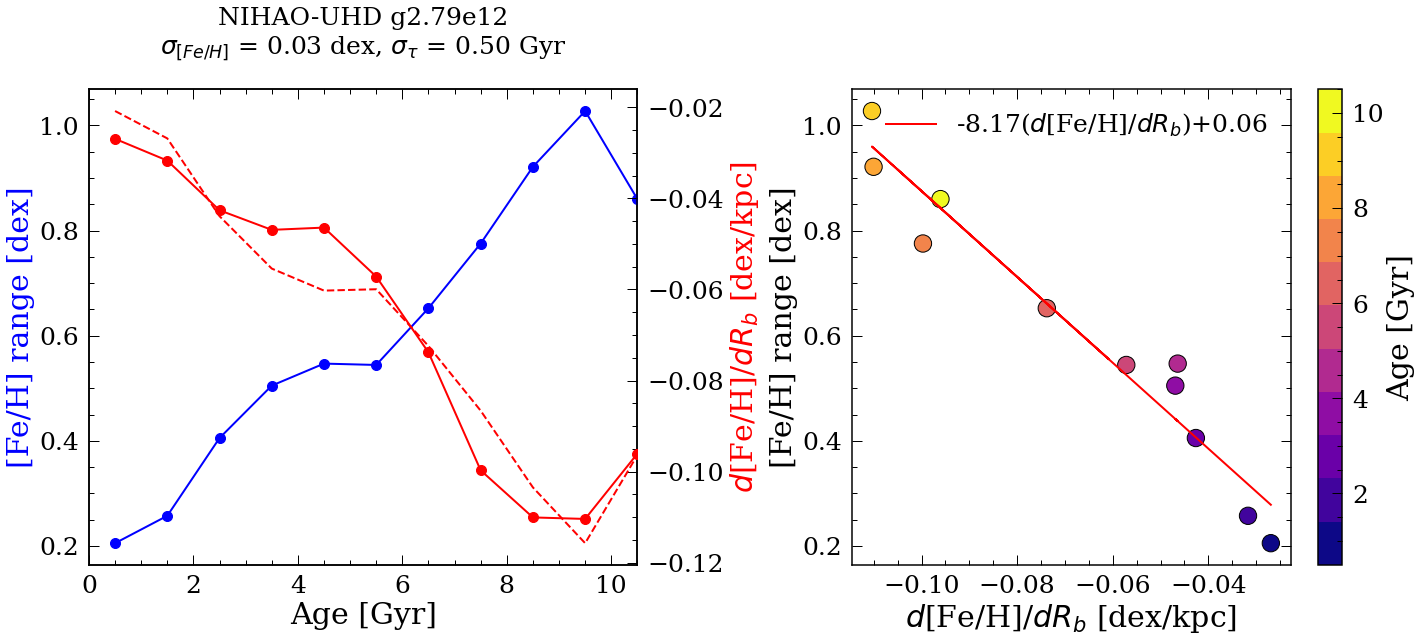

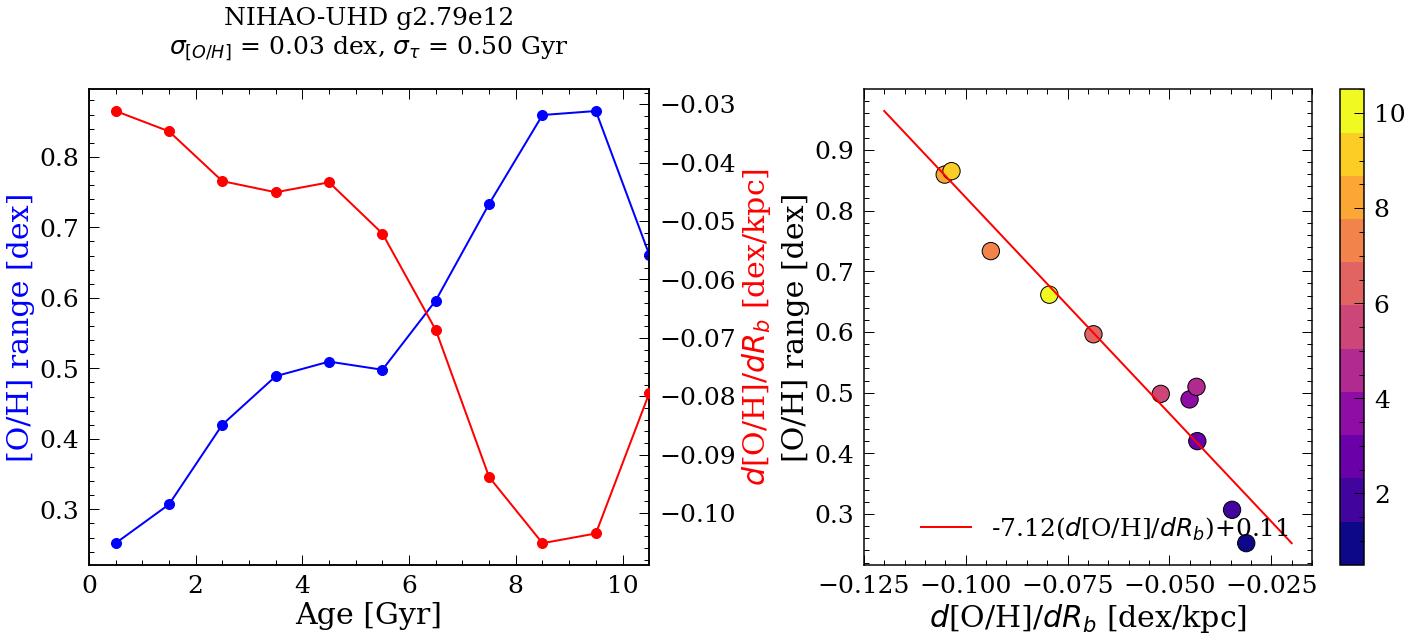

In [35]:
plt.figure(figsize=(20,9))

plt.subplot(1,2,2)
m = df['age']<=10.5
print(sum(m))
x = df['slopes_rbir']
plt.scatter(x[m], df['fehscatter'][m], 
           c=df['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df['fehscatter'][m])


plt.xlabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[Fe/H] range [dex]')
plt.plot(x, p(x), 'r-', 
         label="%.2f($d$[Fe/H]/$dR_b$)+%.2f"%(p[1],p[0]))

p = fitpoints(df['fehscatter'][m], (x)[m])
df['sloperb_inf'] = p(df['fehscatter'])


cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

import scipy
print(scipy.stats.pearsonr(x[m], df['fehscatter'][m]))


plt.subplot(1,2,1)
m = df['age']<=10.5
plt.plot(df['age'][m], df['fehscatter'][m], 'b-o',zorder=5, markersize=10)
#plt.ylim([0,1.5])
plt.ylabel('[Fe/H] range [dex]', color='b',zorder=5)
plt.xlabel('Age [Gyr]')
plt.twinx()

#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
m = df['age']<=10.5
plt.plot(df['age'][m], df['slopes_rbir'][m], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'][m], df['sloperb_inf'][m], 'r--',zorder=5)
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)

#plt.vlines([10.5,4.5], ymin=-1, ymax=2, color='orange', alpha=0.5, zorder=2,
#          linewidth=38)

#plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
"""plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
           linestyles='--', zorder=2, linewidth=3)"""
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.13, 0.02])
plt.title('NIHAO-UHD g2.79e12\n$σ_{[Fe/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.tight_layout()
plt.xlabel('Age [Gyr]')
plt.xlim([0,10.5])
m = (df['age']<=10.5)
print(np.mean(abs((df['slopes_rbir']-df['sloperb_inf'])/df['slopes_rbir'])[m]))

plt.savefig('Figures/eps/scatters_sim',bbox_inches='tight')
plt.savefig('Figures/scatters_sim.png',bbox_inches='tight')




plt.figure(figsize=(20,9))

plt.subplot(1,2,2)
m = df_afe['age']<=10.5
print(sum(m))
x = df_afe['slopes_rbir']
plt.scatter(x[m], df_afe['fehscatter'][m], 
           c=df_afe['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df_afe['fehscatter'][m])
df_afe['sloperb_inf'] = p(df_afe['fehscatter'])

plt.xlabel('$d$[O/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[O/H] range [dex]')
plt.plot([-0.12,-0.02], p([-0.12,-0.02]), 'r-', 
         label="%.2f($d$[O/H]/$dR_b$)+%.2f"%(p[1],p[0]))

p = fitpoints(df_afe['fehscatter'][m], (x)[m])
df['sloperb_inf'] = p(df_afe['fehscatter'])


cb = plt.colorbar()
plt.legend(loc=4)
#plt.xlim([0,0.15])
#plt.ylim([0.08,0.2])

import scipy
print(scipy.stats.pearsonr(x[m], df_afe['fehscatter'][m]))

plt.subplot(1,2,1)
m = df_afe['age']<=10.5
plt.plot(df_afe['age'][m], df_afe['fehscatter'][m], 'b-o',zorder=5, markersize=10)

#plt.ylim([0.095,0.12])
plt.ylabel('[O/H] range [dex]', color='b',zorder=5)
plt.title('NIHAO-UHD g2.79e12\n$σ_{[O/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.xlim([0,10.5])
#plt.ylim([0.2,1.3])
plt.xlabel('Age [Gyr]')
m = (df_afe['age']<=10.5)
print(np.mean(abs((df_afe['slopes_rbir']-df_afe['sloperb_inf'])/df_afe['slopes_rbir'])[m]))


plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df_afe['age'][m], df_afe['slopes_rbir'][m], 'r-o',zorder=5, markersize=10)
#plt.plot(df_afe['age'][m], df_afe['sloperb_inf'][m], 'r--',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[O/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
#plt.vlines([10.5,4.5], ymin=-1, ymax=2, color='orange', alpha=0.5, zorder=2,
#          linewidth=38)
"""plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
           linestyles='--', zorder=2, linewidth=3)"""
#m = mergervir>0.1
#plt.vlines(mergertimes, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
#plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
#plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
#           linestyles='--', zorder=2, linewidth=3)
#plt.plot([0,10.5],[0,0], 'k--',zorder=5)
#plt.ylim([-0.12, 0.02])
plt.xlim([0,10.5])
plt.xlabel('Age [Gyr]')

plt.tight_layout()
plt.savefig('Figures/eps/scatters_ofe_sim',bbox_inches='tight')
plt.savefig('Figures/scatters_ofe_sim.png',bbox_inches='tight')





In [36]:
#plt.plot(mergertimes, mergervir, 'k.')

13
(-0.9772762490816176, 9.307224513073615e-09)
0.07041307874192676


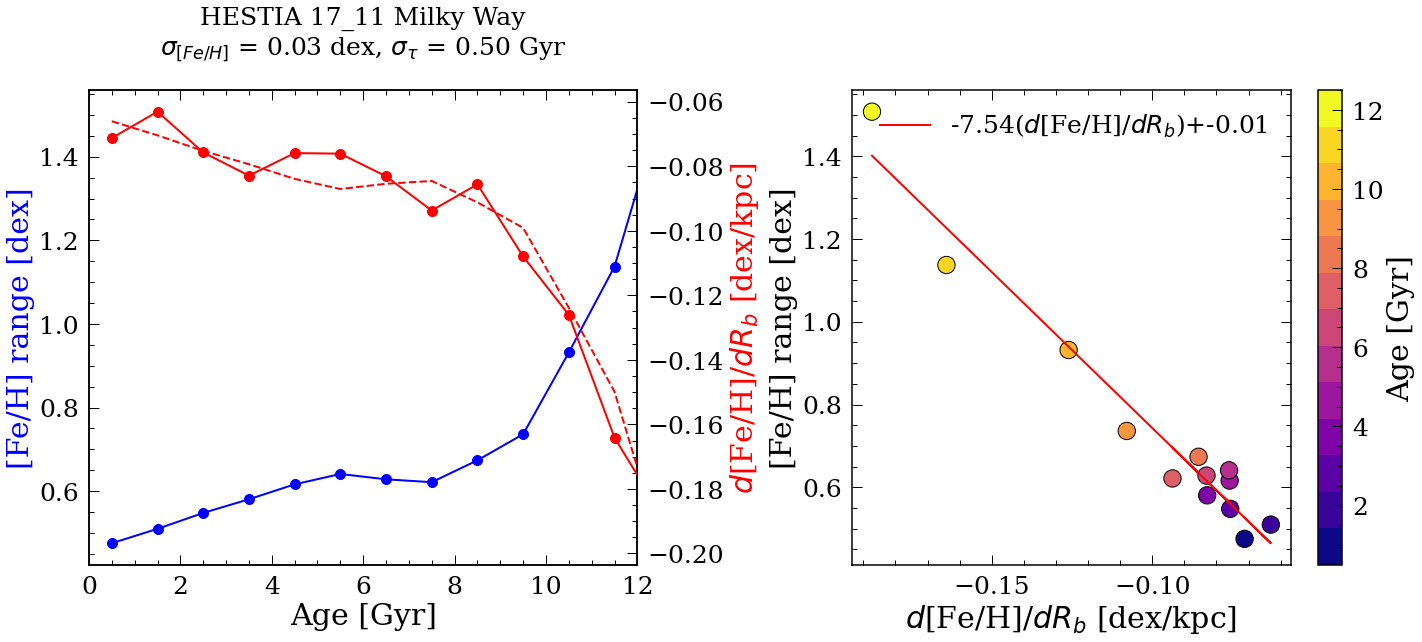

In [37]:
plt.figure(figsize=(20,9))

plt.subplot(1,2,2)
m = df_HESTIA['age']<=13
print(sum(m))
x = df_HESTIA['slopes_rbir']
plt.scatter(x[m], df_HESTIA['fehscatter'][m], 
           c=df_HESTIA['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df_HESTIA['fehscatter'][m])


plt.xlabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[Fe/H] range [dex]')
plt.plot(x, p(x), 'r-', 
         label="%.2f($d$[Fe/H]/$dR_b$)+%.2f"%(p[1],p[0]))

p = fitpoints(df_HESTIA['fehscatter'][m], (x)[m])
df_HESTIA['sloperb_inf'] = p(df_HESTIA['fehscatter'])


cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

import scipy
print(scipy.stats.pearsonr(x[m], df_HESTIA['fehscatter'][m]))


plt.subplot(1,2,1)
m = df_HESTIA['age']<=13
plt.plot(df_HESTIA['age'][m], df_HESTIA['fehscatter'][m], 'b-o',zorder=5, markersize=10)

#plt.vlines([8.5,9.5,11.5,6.5], ymin=-1, ymax=2, color='orange', alpha=0.5, zorder=2,
#          linewidth=38)

#plt.ylim([0,2])
plt.ylabel('[Fe/H] range [dex]', color='b',zorder=5)
plt.title('HESTIA 17_11 Milky Way\n$σ_{[Fe/H]}$ = 0.03 dex, $σ_{τ}$ = 0.50 Gyr\n', fontsize=25)
plt.xlabel('Age [Gyr]')

plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
m = df['age']<=13
plt.plot(df['age'][m], df_HESTIA['slopes_rbir'][m], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'][m], df_HESTIA['sloperb_inf'][m], 'r--',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
"""m = mergervir>0.1
plt.vlines(mergertimes, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=1, zorder=2)
plt.vlines(10.5, ymin=-1, ymax=2, color='k', 
           linestyles='--', zorder=2, linewidth=3)"""
plt.xlabel('Age [Gyr]')
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.2, 0.02])

plt.tight_layout()

#plt.vlines(12, ymin=-1, ymax=2, color='k', 
#           linestyles='--', zorder=2, linewidth=3)

m = (df_HESTIA['age']<=13)
print(np.mean(abs((df_HESTIA['slopes_rbir']-df_HESTIA['sloperb_inf'])/df_HESTIA['slopes_rbir'])[m]))
plt.xlim([0,12])

#plt.ylim([0.25,2])
plt.savefig('Figures/eps/scatters_sim_HESTIA',bbox_inches='tight')
plt.savefig('Figures/scatters_sim_HESTIA.png',bbox_inches='tight')

# Data Part

In [38]:
from astropy.table import Table
sub = Table.read('subgiant_fullparam_update.fits', format='fits')
sub = sub.to_pandas()
sub_rbir = pd.read_csv('RbirLAMOST.csv')
sub_rbir.columns

sub_rbir = sub_rbir.rename(columns={'          rb': 'Rb', 
                                    '          rb_err': 'Rb_err',
                                   '       specid':'specid'})
sub['SPECID'] = [str(i.decode(encoding="utf-8").split()[0]) for i in sub['SPECID']]
sub_rbir['specid'] = [str(i.split()[0]) for i in sub_rbir['specid']]

sub_rbir = pd.merge(sub, 
               sub_rbir[['specid', 'Rb', 'Rb_err']], 
               left_on='SPECID', right_on='specid', how='inner')
print(len(sub_rbir), len(sub))

200674 247104


## selection

In [39]:
#fehscatter

0          NaN
1     0.001075
2     0.000354
3     0.000358
4     0.000367
5     0.000346
6     0.000395
7     0.000396
8     0.000530
9     0.000685
10    0.000752
11    0.000984
12    0.001498
Name: fehscatter_err, dtype: float64


<Figure size 576x576 with 0 Axes>

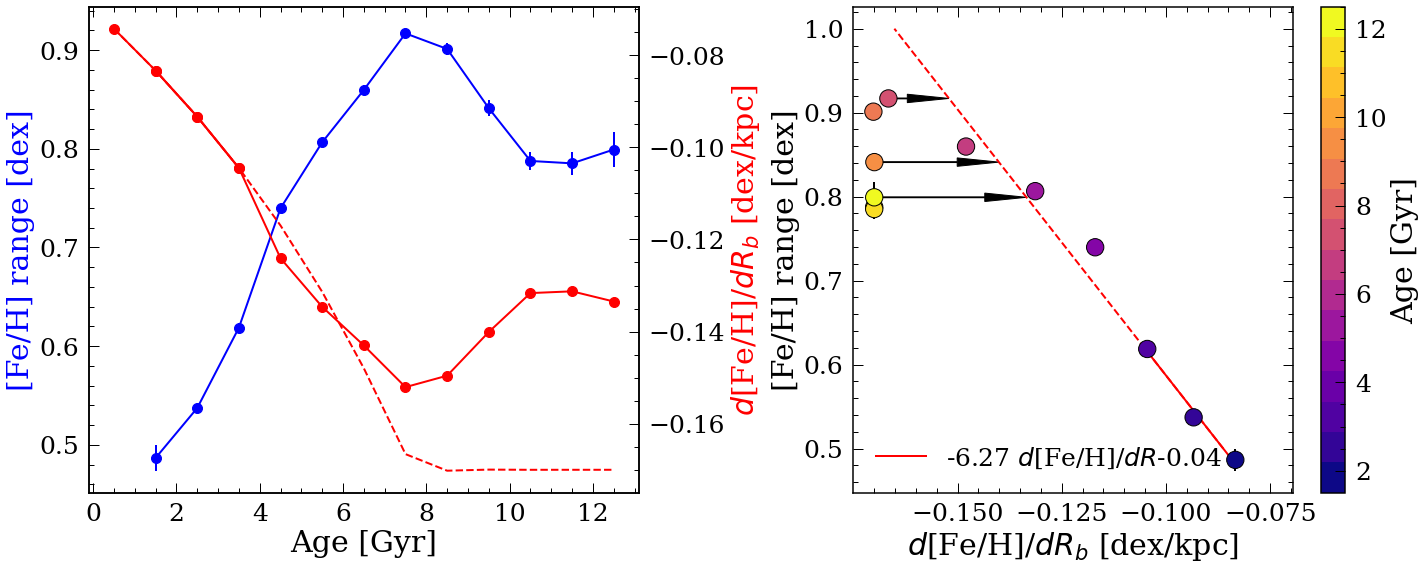

In [40]:
df = pd.read_csv('data_slopps.csv')
ages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']


plt.figure(figsize=(8,8))
x = slopes_rbir

m2 = (ages<4)&(x==x)
m2 = m2&(fehscatter==fehscatter)


p_plot = fitpoints(x[m2], fehscatter[m2])
p = fitpoints(fehscatter[m2], x[m2])



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

m3 = df['age']<13
plt.errorbar(df['age'][m3], df['fehscatter'][m3], yerr=df['fehscatter_err'][m3],
             fmt='b-o',zorder=5, markersize=10)
m = mergervir>0.1
#plt.ylim([0.4,1.2])
plt.ylabel('[Fe/H] range [dex]', color='b',zorder=5)
plt.xlabel('Age [Gyr]')
plt.twinx()
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
m2 = df['age']<4
m3 = df['age']<13
plt.plot(df['age'][m2], df['slopes_rbir'][m2], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'][m3], df['slopes_rbir'][m3], 'r--',zorder=5, markersize=10)

plt.plot(df['age'][m3], df['slope_rbir_infer'][m3], 'r-o',zorder=5, markersize=10)
#plt.vlines(13, -0.25, 0.05, color='k', 
#           linestyles='--', zorder=2, linewidth=3)

plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
m = mergervir>0.1
#plt.plot([0,13],[0,0], 'k--',zorder=5)
#plt.ylim([-0.2, 0.02])


plt.subplot(1,2,2)
m2 = ages<13
plt.scatter(x[m2], fehscatter[m2], 
           c=ages[m2], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)),zorder=10)
plt.errorbar(x[m2], fehscatter[m2], yerr=df['fehscatter_err'][m2],
             fmt='ko',zorder=1, markersize=1)
print(df['fehscatter_err'][m2]/12)
m2 = (ages<4)&(x==x)
plt.plot(p(fehscatter)[m2],
         (fehscatter)[m2], 'r-', 
         label="%.2f $d$[Fe/H]/$dR$-%.2f"%(p_plot[1],abs(p_plot[0])))
plt.plot(p([0.5,1]),
         ([0.5,1]), 'r--')

def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.01, 
              length_includes_head = True,
              color=colors)

drawArrow([x[12],fehscatter[12]],
          [p(fehscatter[12]),fehscatter[12]],'k')
drawArrow([x[9],fehscatter[9]],
          [p(fehscatter[9]),fehscatter[9]],'k')
drawArrow([x[7],fehscatter[7]],
          [p(fehscatter[7]),fehscatter[7]],'k')
         
plt.xlabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[Fe/H] range [dex]')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('Figures/eps/scatters_toslope_data',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_data.png',bbox_inches='tight')


slope_rbir_infer = np.zeros(len(fehscatter))
slope_rbir_infer[~m2] =p((fehscatter[~m2]))
slope_rbir_infer[m2] = slopes_rbir[m2]
df['slope_rbir_infer'] = slope_rbir_infer

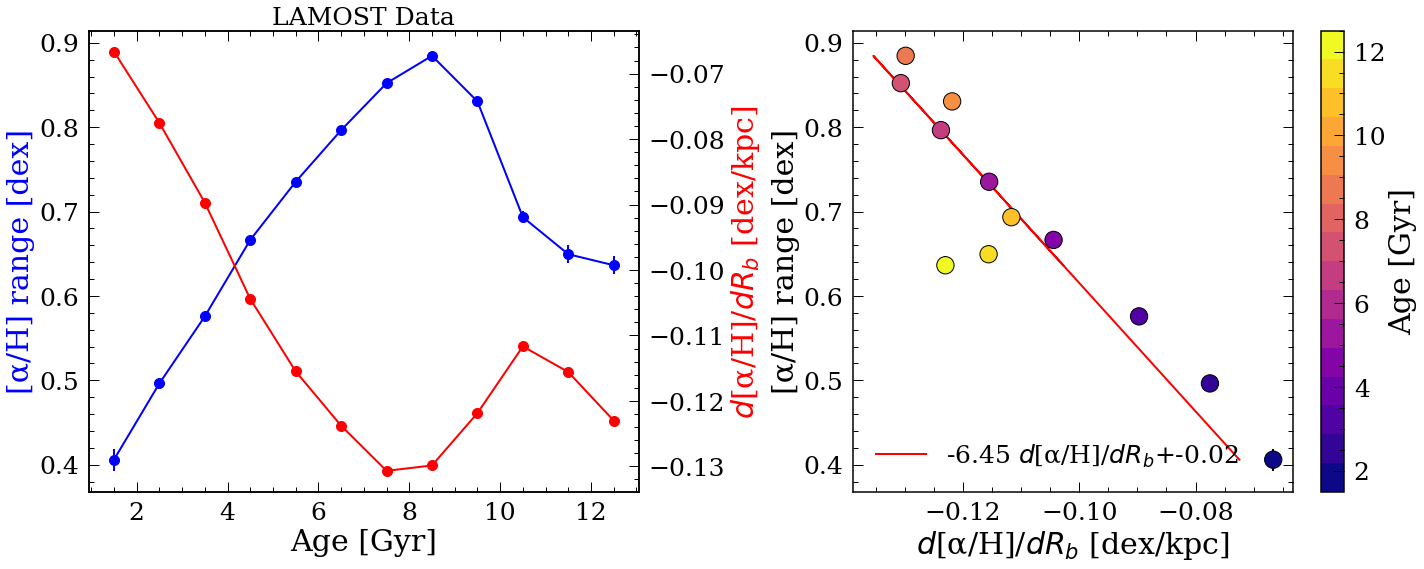

In [41]:
df_afe = pd.read_csv('data_slopps_afe.csv')

ages_afe, slopesafe_rbir,fehscatter_afe,fehscatter_afe_err = df_afe['age'].values, df_afe['slopes_rbir'].values, df_afe['fehscatter'].values,df_afe['fehscatter_err'].values

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
m2 = (ages_afe>0.5)&(ages_afe<13)
plt.errorbar(ages_afe[m2], fehscatter_afe[m2], 
             yerr=fehscatter_afe_err[m2], fmt='b-o',markersize=10)
plt.ylabel('[α/H] range [dex]', color='b',zorder=5)
#plt.ylim([0.3,1])
plt.xlabel('Age [Gyr]')

plt.twinx()
m2 = (ages_afe>0.5)&(ages_afe<13)
slopesafe_rbir, fehscatter_afe, fehscatter_afe_err = np.array(slopesafe_rbir,dtype=float), np.array(fehscatter_afe,dtype=float), np.array(fehscatter_afe_err,dtype=float)



m2 = (ages_afe>0.5)&(ages_afe<13)
plt.plot(ages_afe[m2], slopesafe_rbir[m2], 'r-o',zorder=5,markersize=10)
plt.xlabel('Age [Gyr]')
plt.ylabel('$d$[α/H]/$dR_b$ [dex/kpc]', color='r',zorder=5)
#plt.plot([0,14],[0,0], 'k--',zorder=5)
#plt.ylim([-0.15, 0.05])
plt.title('LAMOST Data', fontsize=25)


plt.subplot(1,2,2)
plt.scatter(slopesafe_rbir[m2], fehscatter_afe[m2], 
           c=ages_afe[m2], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)),zorder=10)
plt.errorbar(slopesafe_rbir[m2], fehscatter_afe[m2], 
             yerr=fehscatter_afe_err[m2], fmt='ko',zorder=-1)

p_plot = fitpoints(slopesafe_rbir[m2], fehscatter_afe[m2])
p = fitpoints(fehscatter_afe[m2], slopesafe_rbir[m2])
plt.xlabel('$d$[α/H]/$dR_b$ [dex/kpc]')
plt.ylabel('[α/H] range [dex]')
plt.plot(p(fehscatter_afe)[m2],
         (fehscatter_afe)[m2], 'r-', 
         label="%.2f $d$[α/H]/$dR_b$+%.2f"%(p_plot[1],p_plot[0]))

cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

plt.tight_layout()




plt.savefig('Figures/eps/scatters_toslope_data_afe',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_data_afe.png',bbox_inches='tight')



0      0.5
1      1.5
2      2.5
3      3.5
4      4.5
5      5.5
6      6.5
7      7.5
8      8.5
9      9.5
10    10.5
11    11.5
12    12.5
13    13.5
14    14.5
15    15.5
Name: age, dtype: float64 0     0.617593
1     0.603701
2     0.588068
3     0.570195
4     0.549330
5     0.524266
6     0.492877
7     0.450851
8     0.396391
9     0.283086
10    0.018048
11   -0.146534
12   -0.297363
13   -0.332630
14   -0.397431
15   -0.424546
Name: feh_cor, dtype: float64


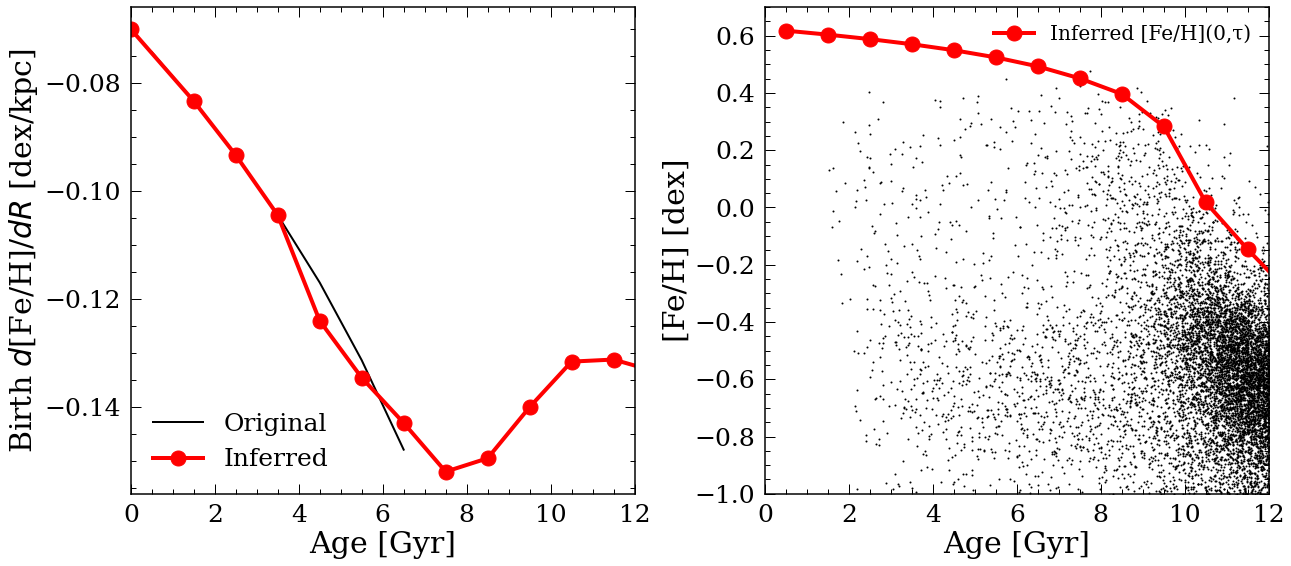

In [19]:

sub_tryRb = pd.read_pickle('NewRb.pkl')
#sub_tryRb = pd.read_pickle('NewRb_dip.pkl')

df = pd.read_csv('slopes_cor.csv')
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
m = (ages<7)
plt.plot(ages[m], slopes_rbir[m], 'k-', label='Original')
mnana =(df['slope_cor'].values==df['slope_cor'].values)

newages = np.append([0],df['age'].values[mnana])
newslopes = np.append([-0.07],df['slope_cor'].values[mnana])


plt.plot(newages, 
         newslopes, 
         'r-o', label='Inferred',
        linewidth=4, markersize=15)
plt.ylabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]')
plt.xlabel('Age [Gyr]')
plt.legend(loc=3)
plt.tight_layout()
plt.xlim([0,12])


df = pd.read_csv('slopes_cor.csv')
plt.subplot(1,2,2)
sub_tryRb_inner = sub_tryRb.loc[sub_tryRb['R_GUIDING']<5]
"""plt.hexbin(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 
           cmap=plt.get_cmap('binary',15), gridsize=50,
           extent=(0,16,-1,0.7))"""
plt.plot(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 'ko',
        markersize=1)
plt.plot(df['age'], df['feh_cor'], 'r-o',label='Inferred [Fe/H](0,τ)',
        linewidth=4, markersize=15)
plt.xlim([0,12])
plt.ylim([-1,0.7])
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')
plt.tight_layout()
#cb = plt.colorbar()
#cb.set_label('Density')
plt.legend(fontsize=20)

plt.savefig('Figures/eps/corrected_slope',bbox_inches='tight')
plt.savefig('Figures/corrected_slope.png',bbox_inches='tight')
print(df['age'], df['feh_cor'])

In [20]:
"""print(len(sub_tryRb))
cols_to_use = df2.columns.difference(sub_tryRb.columns)
sub_allele = pd.merge(sub_tryRb, 
                     pd.read_csv('Xiang_elements.csv')[np.append(['SPECID'], cols_to_use)],
                    left_on='SPECID', right_on='SPECID',how='inner')
print(len(sub_tryRb))"""

"print(len(sub_tryRb))\ncols_to_use = df2.columns.difference(sub_tryRb.columns)\nsub_allele = pd.merge(sub_tryRb, \n                     pd.read_csv('Xiang_elements.csv')[np.append(['SPECID'], cols_to_use)],\n                    left_on='SPECID', right_on='SPECID',how='inner')\nprint(len(sub_tryRb))"

In [21]:
#sub_tryRb.to_csv('LAMOSTRbir.csv', index=False)

In [24]:
"""plt.figure(figsize=(8,8))
for i in [1,3,5,7,9]:
    plt.plot(np.linspace(0.5,12.5,13), 
             slope_inf(np.linspace(0.5,12.5,13))*i+ave_inf(np.linspace(0.5,12.5,13)), 
             'r--o',linewidth=1)
plt.grid(color='grey', linestyle='-', linewidth=1, which='both')
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')"""

"plt.figure(figsize=(8,8))\nfor i in [1,3,5,7,9]:\n    plt.plot(np.linspace(0.5,12.5,13), \n             slope_inf(np.linspace(0.5,12.5,13))*i+ave_inf(np.linspace(0.5,12.5,13)), \n             'r--o',linewidth=1)\nplt.grid(color='grey', linestyle='-', linewidth=1, which='both')\nplt.xlabel('Age [Gyr]')\nplt.ylabel('[Fe/H]')"

In [25]:
"""df = pd.read_csv('data_slopps.csv')
ages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']


df = pd.read_csv('slopes_cor.csv')
mfit = (df['slope_cor']==df['slope_cor'])
mfit = mfit&(df['age']<=13)
mfit_all = newages<13
slope_inf = interp1d(newages, newslopes,'linear')
ave_inf = interp1d(df['age'], df['feh_cor'],'linear')

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.plot(newages[mfit_all], newslopes[mfit_all], 'ko', markersize=15)
plt.plot(np.linspace(0.5,12.5,100), slope_inf(np.linspace(0.5,12.5,100)), 'r--',
        linewidth=4)
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')
plt.twinx()
plt.plot(ages[ages<13], fehscatter[ages<13], 'b--o', markersize=15,
        linewidth=4)
#plt.ylim([-0.1,0])
#plt.vlines(12, ymin=-0.1, ymax=-0.07, color='k')


plt.subplot(1,2,2)
#m = (df['age']<12)
plt.plot(df['age'][mfit], slope_inf(df['age'][mfit])*8.2+ave_inf(df['age'][mfit]), 
         'ko', markersize=15)
plt.plot(np.linspace(0.5,12.5,100), 
         slope_inf(np.linspace(0.5,12.5,100))*8.2+ave_inf(np.linspace(0.5,12.5,100)), 
         'r--',linewidth=4)
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('[Fe/H](R$_{\odot}$, τ) [dex]')

plt.tight_layout()


plt.savefig('Figures/eps/finalfunc',bbox_inches='tight')
plt.savefig('Figures/finalfunc.png',bbox_inches='tight')"""

"df = pd.read_csv('data_slopps.csv')\nages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']\n\n\ndf = pd.read_csv('slopes_cor.csv')\nmfit = (df['slope_cor']==df['slope_cor'])\nmfit = mfit&(df['age']<=13)\nmfit_all = newages<13\nslope_inf = interp1d(newages, newslopes,'linear')\nave_inf = interp1d(df['age'], df['feh_cor'],'linear')\n\nplt.figure(figsize=(20,9))\nplt.subplot(1,2,1)\nplt.plot(newages[mfit_all], newslopes[mfit_all], 'ko', markersize=15)\nplt.plot(np.linspace(0.5,12.5,100), slope_inf(np.linspace(0.5,12.5,100)), 'r--',\n        linewidth=4)\nplt.xlabel('Look-back Time [Gyr]')\nplt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]')\nplt.twinx()\nplt.plot(ages[ages<13], fehscatter[ages<13], 'b--o', markersize=15,\n        linewidth=4)\n#plt.ylim([-0.1,0])\n#plt.vlines(12, ymin=-0.1, ymax=-0.07, color='k')\n\n\nplt.subplot(1,2,2)\n#m = (df['age']<12)\nplt.plot(df['age'][mfit], slope_inf(df['age'][mfit])*8.2+ave_inf(df['age'][mfit]), \n         'ko', markersize=15)\np

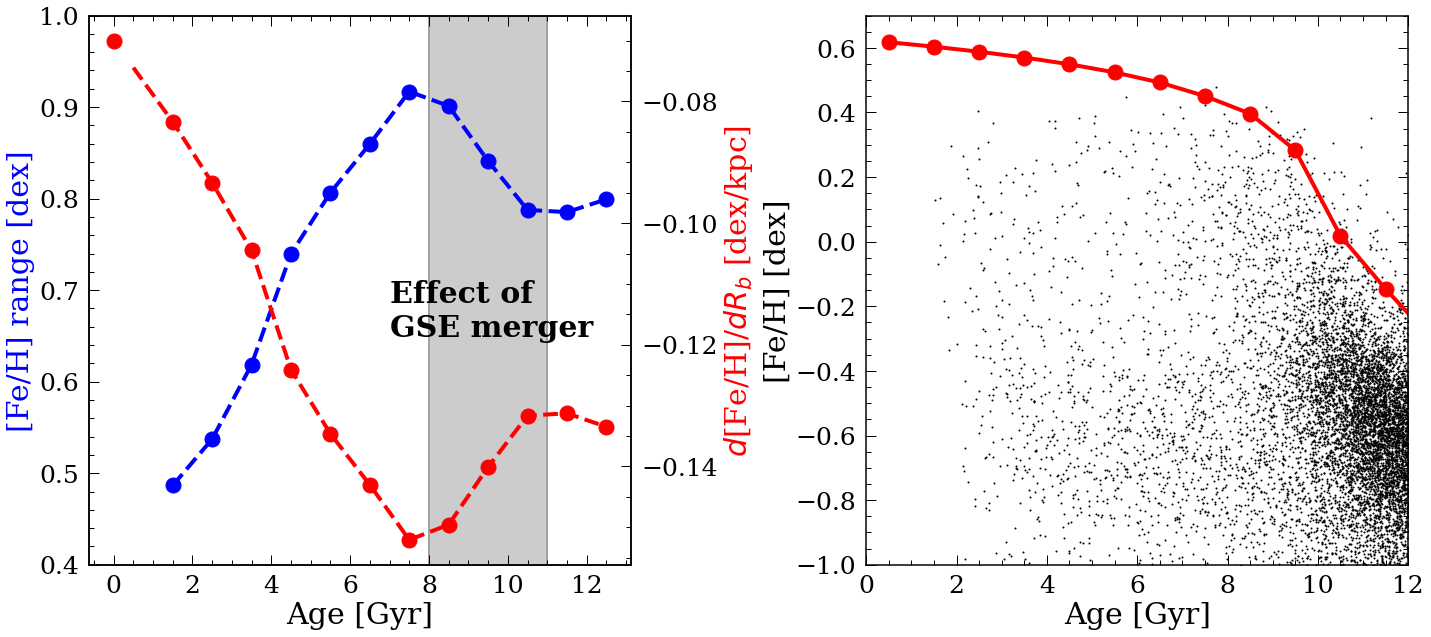

In [26]:
df = pd.read_csv('data_slopps.csv')
ages, fehscatter, slopes_rbir = df['age'], df['fehscatter'], df['slopes_rbir']


df = pd.read_csv('slopes_cor.csv')
mfit = (df['slope_cor']==df['slope_cor'])
mfit = mfit&(df['age']<=13)
mfit_all = newages<13
slope_inf = interp1d(newages, newslopes,'linear')
ave_inf = interp1d(df['age'], df['feh_cor'],'linear')

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.5, head_length=0.02, 
              length_includes_head = True,
              color=colors, linewidth=10)
"""drawArrow([8,0.6],[8,0.5],'k')
"""
plt.plot(ages[ages<13], fehscatter[ages<13], 'b--o', markersize=15,
        linewidth=4)
plt.ylabel('[Fe/H] range [dex]',color='b')
plt.vlines([8,11], ymin=0.4, ymax=1, color='k', alpha=0.2,
          zorder=1)
plt.vlines([9.5], ymin=0.4, ymax=1, color='k', alpha=0.2,
          zorder=1, linewidth=120)
plt.ylim([0.4,1])
plt.annotate('Effect of\nGSE merger',(7,0.65), fontsize=30,
            weight='bold')
plt.xlabel('Age [Gyr]')
plt.twinx()
plt.plot(newages[mfit_all], newslopes[mfit_all], 'ro', markersize=15)
plt.plot(np.linspace(0.5,12.5,100), slope_inf(np.linspace(0.5,12.5,100)), 'r--',
        linewidth=4)
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR_b$ [dex/kpc]',color='r')




plt.subplot(1,2,2)
sub_tryRb_inner = sub_tryRb.loc[sub_tryRb['R_GUIDING']<5]
"""plt.hexbin(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 
           cmap=plt.get_cmap('binary',15), gridsize=50,
           extent=(0,16,-1,0.7))"""
plt.plot(sub_tryRb_inner['AGE'], sub_tryRb_inner['FEH'], 'ko',
        markersize=1)
plt.plot(df['age'], df['feh_cor'], 'r-o',label='Inferred [Fe/H](0,τ)',
        linewidth=4, markersize=15)
plt.xlim([0,12])
plt.ylim([-1,0.7])
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')

plt.tight_layout()


plt.savefig('Figures/eps/finalfunc.pdf',bbox_inches='tight')
plt.savefig('Figures/finalfunc.png',bbox_inches='tight')

## With new Rb

In [136]:
sub_tryRb = pd.read_pickle('NewRb.pkl')
#print(len(sub_tryRb))
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH']>-1]
#sub_tryRb = pd.read_pickle('NewRb_dip.pkl')

print(len(sub_tryRb), sum(sub_tryRb['Rb']<0)/len(sub_tryRb))

217672 0.014889374839207615


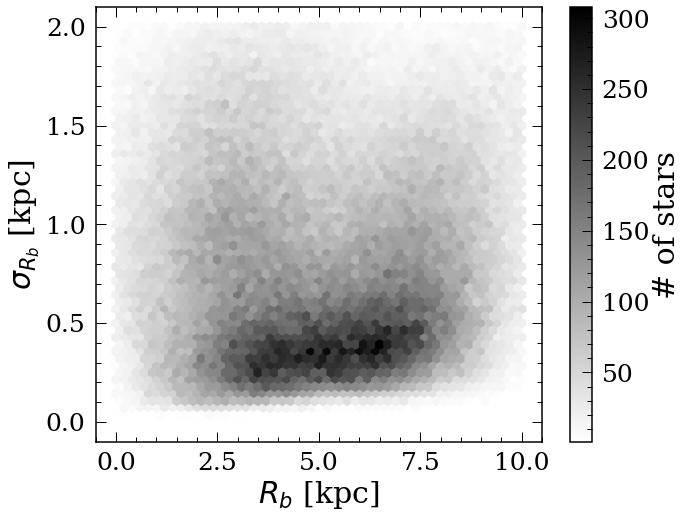

In [56]:
plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['Rb'], sub_tryRb['Rb_err'], mincnt=1,
          cmap=plt.get_cmap('binary'),extent=(0,10,0,2),
          gridsize=50)
plt.colorbar(label='# of stars')
plt.xlabel('$R_b$ [kpc]')
plt.ylabel('$σ_{R_b}$ [kpc]')

plt.savefig('./Figures/eps/Rbirerror')
plt.savefig('./Figures/Rbirerror.png')


In [57]:
"""plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['R'], sub_tryRb['Z'],
          C=sub_tryRb['Rb'], vmin=3, vmax=10,
          cmap=plt.get_cmap('plasma',10), extent=(5,13,-3,3),
          mincnt=20)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.colorbar(label='Rb [kpc]')

plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['X'], sub_tryRb['Y'],
          C=sub_tryRb['Rb'], vmin=3, vmax=10,
          cmap=plt.get_cmap('plasma',10), extent=(5,12,-4,4),
          mincnt=20)
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.colorbar(label='Rb [kpc]')
"""

"plt.figure(figsize=(10,8))\nplt.hexbin(sub_tryRb['R'], sub_tryRb['Z'],\n          C=sub_tryRb['Rb'], vmin=3, vmax=10,\n          cmap=plt.get_cmap('plasma',10), extent=(5,13,-3,3),\n          mincnt=20)\nplt.xlabel('R [kpc]')\nplt.ylabel('z [kpc]')\nplt.colorbar(label='Rb [kpc]')\n\nplt.figure(figsize=(10,8))\nplt.hexbin(sub_tryRb['X'], sub_tryRb['Y'],\n          C=sub_tryRb['Rb'], vmin=3, vmax=10,\n          cmap=plt.get_cmap('plasma',10), extent=(5,12,-4,4),\n          mincnt=20)\nplt.xlabel('X [kpc]')\nplt.ylabel('Y [kpc]')\nplt.colorbar(label='Rb [kpc]')\n"

In [58]:
"""N=20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

np.shape(sub_sing['Rb'])
#kde"""

"N=20\nX = np.concatenate(\n    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))\n)[:, np.newaxis]\n\nnp.shape(sub_sing['Rb'])\n#kde"

217672


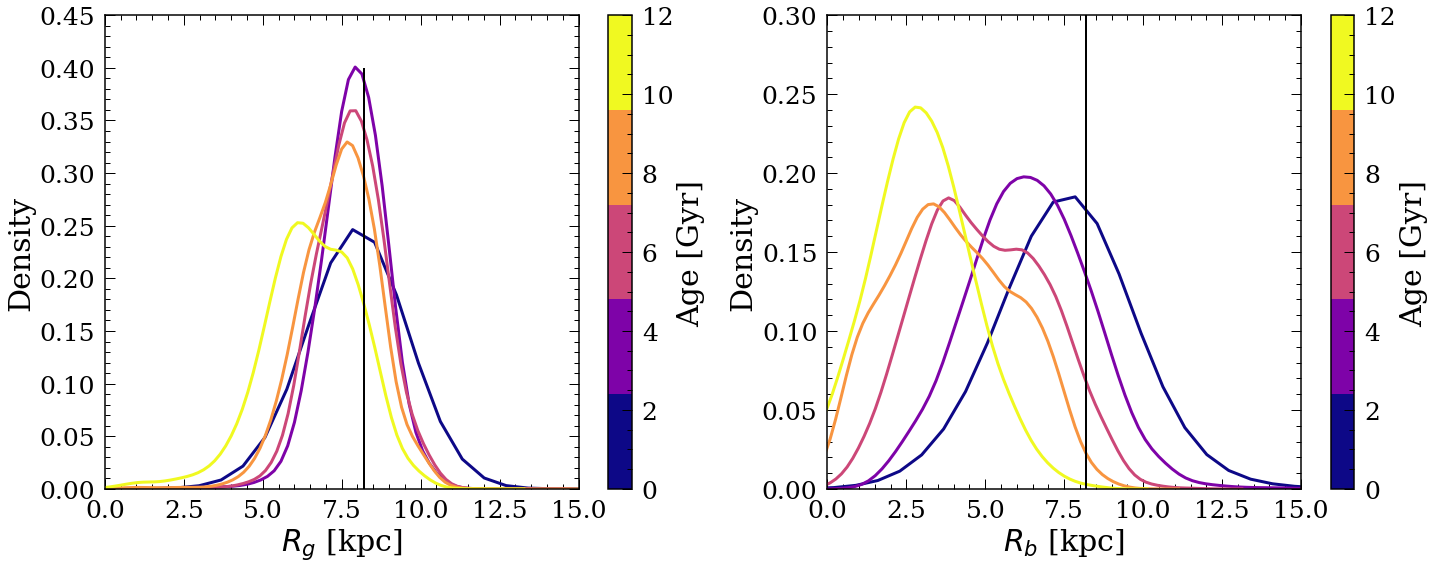

In [59]:
sub_tryRb = pd.read_pickle('NewRb.pkl')
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH']>-1]
sub_tryRb = sub_tryRb.loc[sub_tryRb['AGE']<13]
print(len(sub_tryRb))

agebin_Rb = np.linspace(0,12,6)
agebin_colors = getcolor(range(len(agebin_Rb)-1))

from sklearn.neighbors import KernelDensity


plt.figure(figsize=(20,8))

#plt.hist(sub_tryRb['Rb'], color='k', alpha=0.2, bins=np.linspace(0,20,100))
#m = abs(sub_tryRb['R']-8.2)<100
m = (sub_tryRb['R']>7.7)&(sub_tryRb['R']<8.7)
#m = m&(sub_tryRb['FEH']>-1)
data_rbdis = sub_tryRb[m]
plt.subplot(1,2,2)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    m2 = (fre!=0)
    plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    #m2 = (fre_g!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre_g[m2], '--', color=agebin_colors[i], linewidth=3)
    
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.3, color='k')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.3])
#plt.yscale('log')
plt.xlabel('$R_b$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')


plt.subplot(1,2,1)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    #fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    #fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    #m2 = (fre!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    m2 = (fre_g!=0)
    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)
    
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.4, color='k')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.45])
#plt.yscale('log')
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')

plt.tight_layout()


plt.savefig('Figures/eps/rbirdist',bbox_inches='tight')
plt.savefig('Figures/rbirdist.png',bbox_inches='tight')

In [60]:
"""
agebin_Rb = np.linspace(0,12,13)
agebin_colors = getcolor(range(len(agebin_Rb)-1))

from sklearn.neighbors import KernelDensity


plt.figure(figsize=(10,8))
data_rbdis = sub_tryRb
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]
    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    fre_g = gaussian_filter(fre_g, 2)
    
    m2 = (fre_g!=0)
    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)
    
    m = (sub_sing['FEH']>np.percentile(sub_sing['FEH'], 5))&(sub_sing['FEH']<np.percentile(sub_sing['FEH'], 95))
    m = m&(sub_sing['R_GUIDING']<20)
    
    if sum(m)==0:
        continue
    print(agebin_Rb[i]/2+agebin_Rb[i+1]/2, 
          min(sub_sing['R_GUIDING'][m]), 
          max(sub_sing['R_GUIDING'][m]))
    
plt.vlines(8.2, ymin=0, ymax=0.4, color='k')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.45])
#plt.yscale('log')
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')

plt.tight_layout()


plt.savefig('Figures/eps/rbirdist',bbox_inches='tight')
plt.savefig('Figures/rbirdist.png',bbox_inches='tight')"""

"\nagebin_Rb = np.linspace(0,12,13)\nagebin_colors = getcolor(range(len(agebin_Rb)-1))\n\nfrom sklearn.neighbors import KernelDensity\n\n\nplt.figure(figsize=(10,8))\ndata_rbdis = sub_tryRb\nfor i in range(len(agebin_Rb)-1):\n    sub_sing = data_rbdis.loc[(data_rbdis['AGE']>agebin_Rb[i])&(data_rbdis['AGE']<agebin_Rb[i+1])]\n    fre_g, edg_g = np.histogram(sub_sing['R_GUIDING'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)\n    \n    fre_g = gaussian_filter(fre_g, 2)\n    \n    m2 = (fre_g!=0)\n    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)\n    \n    m = (sub_sing['FEH']>np.percentile(sub_sing['FEH'], 5))&(sub_sing['FEH']<np.percentile(sub_sing['FEH'], 95))\n    m = m&(sub_sing['R_GUIDING']<20)\n    \n    if sum(m)==0:\n        continue\n    print(agebin_Rb[i]/2+agebin_Rb[i+1]/2, \n          min(sub_sing['R_GUIDING'][m]), \n          max(sub_sing['R_GUIDING'][m]))\n    \nplt.vlines(8.2, ymin=0, ymax=0.4, color='k')\nplt.

In [61]:
"""def hilow_disk(feh, alpha):
    hi_low = np.zeros(len(feh))
    
    m = feh<-0.5
    hi_low[m] = alpha[m]>0.15
    
    p = fitpoints([-0.5,0.5], [0.15,0])
    hi_low[~m] = alpha[~m]>p(feh[~m])
    
    return hi_low

sub_tryRb['hi_low'] = hilow_disk(sub_tryRb['FEH'].values, sub_tryRb['ALPHA_FE'].values)


m = (sub_tryRb['hi_low']==1)


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(sub_tryRb['AGE'][m], sub_tryRb['FEH'][m], C=sub_tryRb['Rb_new'][m], 
          vmin=0, vmax=15, cmap=plt.get_cmap('plasma',10),
          extent=(1.5,16,-1,0.5))
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')

counts, ybins, xbins = np.histogram2d(sub_tryRb['AGE'][m], sub_tryRb['FEH'][m], 
                                       bins=100,range=([1.5,16],[-2.5,0.5]))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.xlim([1.5,16])
plt.ylim([-1,0.5])



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(sub_tryRb['AGE'][~m], sub_tryRb['FEH'][~m], C=sub_tryRb['Rb_new'][~m], 
          vmin=0, vmax=15, cmap=plt.get_cmap('plasma',10),
          extent=(1.5,16,-1,0.5))
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')

counts, ybins, xbins = np.histogram2d(sub_tryRb['AGE'][~m], sub_tryRb['FEH'][~m], 
                                       bins=100,range=([1.5,16],[-2.5,0.5]))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.xlim([1.5,16])
plt.ylim([-1,0.5])
"""

"def hilow_disk(feh, alpha):\n    hi_low = np.zeros(len(feh))\n    \n    m = feh<-0.5\n    hi_low[m] = alpha[m]>0.15\n    \n    p = fitpoints([-0.5,0.5], [0.15,0])\n    hi_low[~m] = alpha[~m]>p(feh[~m])\n    \n    return hi_low\n\nsub_tryRb['hi_low'] = hilow_disk(sub_tryRb['FEH'].values, sub_tryRb['ALPHA_FE'].values)\n\n\nm = (sub_tryRb['hi_low']==1)\n\n\nplt.figure(figsize=(20,8))\nplt.subplot(1,2,1)\nplt.hexbin(sub_tryRb['AGE'][m], sub_tryRb['FEH'][m], C=sub_tryRb['Rb_new'][m], \n          vmin=0, vmax=15, cmap=plt.get_cmap('plasma',10),\n          extent=(1.5,16,-1,0.5))\ncb = plt.colorbar()\ncb.set_label('$R_b$ [kpc]')\n\ncounts, ybins, xbins = np.histogram2d(sub_tryRb['AGE'][m], sub_tryRb['FEH'][m], \n                                       bins=100,range=([1.5,16],[-2.5,0.5]))\nplt.xlabel('Age [Gyr]')\nplt.ylabel('[Fe/H]')\nplt.xlim([1.5,16])\nplt.ylim([-1,0.5])\n\n\n\nplt.figure(figsize=(20,8))\nplt.subplot(1,2,1)\nplt.hexbin(sub_tryRb['AGE'][~m], sub_tryRb['FEH'][~m], C=sub_tryR

In [137]:
"""ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_agebin.npy', allow_pickle=True)

colors = getcolor(np.linspace(2,12,sum(rs<12)))


fig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(24,24))


fig.text(0.42, 0.82, '$σ_z$', fontsize=30)
fig.text(0.82, 0.82, '$σ_ϕ$', fontsize=30)
fig.text(0.42, 0.42, '$σ_R$', fontsize=30)
fig.text(0.82, 0.42, '$σ_z$/$σ_R$', fontsize=30)

fig.text(0.45, 0.08, '$R_b$ [kpc]', fontsize=40)
fig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')


for i in range(len(rs)):
    if rs[i]<12:
        axarr[0,0].plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,0].set_ylim([10, 70])
axarr[0,0].set_xlim([0,15])


for i in range(len(rs)):
    if rs[i]<12:
        axarr[0,1].plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,1].set_ylim([15, 50])
axarr[0,1].set_xlim([0,15])


for i in range(len(rs)):
    if rs[i]<12:
        axarr[1,0].plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[1,0].set_ylim([20, 80])
axarr[1,0].set_xlim([0,15])

for i in range(len(rs)):
    if rs[i]<12:
        axarr[1,1].plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', 
                    color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=12, zorder=10)
axarr[1,1].set_ylim([0.25, 1])
axarr[1,1].set_xlim([0,15])
im = axarr[1,1].scatter(-100, -100, c=1, vmin=min(rs), vmax=12, 
                        cmap=plt.get_cmap('plasma',10))
axarr[1,1].plot([0,20], [0.5,0.5], 'r--', linewidth=10, zorder=1)

cb_ax = fig.add_axes([0.11, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


plt.savefig('Figures/eps/vd_agebin',bbox_inches='tight')
plt.savefig('Figures/vd_agebin.png',bbox_inches='tight')"""

"ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_agebin.npy', allow_pickle=True)\n\ncolors = getcolor(np.linspace(2,12,sum(rs<12)))\n\n\nfig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},\n                          figsize=(24,24))\n\n\nfig.text(0.42, 0.82, '$σ_z$', fontsize=30)\nfig.text(0.82, 0.82, '$σ_ϕ$', fontsize=30)\nfig.text(0.42, 0.42, '$σ_R$', fontsize=30)\nfig.text(0.82, 0.42, '$σ_z$/$σ_R$', fontsize=30)\n\nfig.text(0.45, 0.08, '$R_b$ [kpc]', fontsize=40)\nfig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')\n\n\nfor i in range(len(rs)):\n    if rs[i]<12:\n        axarr[0,0].plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],\n            markersize=15)\naxarr[0,0].set_ylim([10, 70])\naxarr[0,0].set_xlim([0,15])\n\n\nfor i in range(len(rs)):\n    if rs[i]<12:\n        axarr[0,1].plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],\n            markersize=15)\naxarr[0,1].set_ylim([15, 50]

In [138]:
"""ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_Rbin.npy', allow_pickle=True)

colors = getcolor(rs)


fig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(24,24))


fig.text(0.17, 0.82, '$σ_z$', fontsize=30)
fig.text(0.57, 0.82, '$σ_ϕ$', fontsize=30)
fig.text(0.17, 0.42, '$σ_R$', fontsize=30)
fig.text(0.57, 0.42, '$σ_z$/$σ_R$', fontsize=30)

fig.text(0.45, 0.08, 'Age [Gyr]', fontsize=40)
fig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')


for i in range(len(rs)):
    m = (ages<12)
    axarr[0,0].plot(ages[m], avrs_z[i,:][m], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,0].set_ylim([10, 80])
axarr[0,0].set_xlim([0,13])


for i in range(len(rs)):
    m = (ages<12)
    axarr[0,1].plot(ages[m], avrs_phi[i,:][m], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,1].set_ylim([10, 50])
axarr[0,1].set_xlim([0,13])


for i in range(len(rs)):
    m = (ages<12)
    axarr[1,0].plot(ages[m], avrs_r[i,:][m], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[1,0].set_ylim([20, 100])
axarr[1,0].set_xlim([0,13])

for i in range(len(rs)):
    m = (ages<12)
    axarr[1,1].plot(ages[m], avrs_z[i,:][m]/avrs_r[i,:][m], 'o-', 
                    color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15, zorder=10)
axarr[1,1].set_ylim([0.25, 1.2])
axarr[1,1].set_xlim([0,13])
im = axarr[1,1].scatter(-100, -100, c=1, vmin=min(rs), 
                        vmax=max(rs), cmap=plt.get_cmap('plasma',4))
axarr[1,1].plot([0,20], [0.5,0.5], 'r--', linewidth=10, zorder=1)

cb_ax = fig.add_axes([0.11, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('$R_b$ [kpc]',fontsize = 50,labelpad = 5)



plt.savefig('Figures/eps/vd_Rbin',bbox_inches='tight')
plt.savefig('Figures/vd_Rbin.png',bbox_inches='tight')

"""

"ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_Rbin.npy', allow_pickle=True)\n\ncolors = getcolor(rs)\n\n\nfig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},\n                          figsize=(24,24))\n\n\nfig.text(0.17, 0.82, '$σ_z$', fontsize=30)\nfig.text(0.57, 0.82, '$σ_ϕ$', fontsize=30)\nfig.text(0.17, 0.42, '$σ_R$', fontsize=30)\nfig.text(0.57, 0.42, '$σ_z$/$σ_R$', fontsize=30)\n\nfig.text(0.45, 0.08, 'Age [Gyr]', fontsize=40)\nfig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')\n\n\nfor i in range(len(rs)):\n    m = (ages<12)\n    axarr[0,0].plot(ages[m], avrs_z[i,:][m], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],\n            markersize=15)\naxarr[0,0].set_ylim([10, 80])\naxarr[0,0].set_xlim([0,13])\n\n\nfor i in range(len(rs)):\n    m = (ages<12)\n    axarr[0,1].plot(ages[m], avrs_phi[i,:][m], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],\n            markersize=15)\naxarr[0,1].set_ylim([10, 50])\naxarr[0,1].set_xlim([

In [64]:
import warnings
warnings.filterwarnings('ignore')

def movingMed_time(x,y,x_window,delta_x_window):
    # medians output
    x_med=np.zeros(len(x))
    y_med=np.zeros(len(y))

    # define the boundaries of the windows
    if len(x)==0:
        return x_med,y_med
    window_min=float(min(x))
    window_max=float(window_min+delta_x_window)
    
    # max time
    maxtime=max(x)
    
    # break when time window hits the end
    while window_max<=maxtime+x_window:
        seldf=(x>=window_min) & (x<=window_max) # get points between the window
        if sum(seldf)<100:
            x_med[seldf]=np.nan
            y_med[seldf]=np.nan
        else:
            x_med[seldf]=np.median(x[seldf]) # all values for these indices are subsituded with median time
            y_med[seldf]=np.median(y[seldf]) # all values for these indices are subsituded with median flux

        # slide the window
        window_min=window_min+delta_x_window
        window_max=window_max+delta_x_window
    return x_med, y_med

In [65]:
def coldensity(x,y,binsize=50,extend=[]):
    if len(extend)==0:
        extend=(min(x),max(x),min(y),max(y))
    H, yedges, xedges = np.histogram2d(x, y, 
                                bins=(np.linspace(extend[0],extend[1],binsize),
                                        np.linspace(extend[2],extend[3],binsize)))
    """for i in trange(len(yedges)-1):
        m = (x>yedges[i])&(x<yedges[i+1])
        H[i,:] = (H[i,:]/sum(m))/max(H[i,:]/sum(m))"""
    for i in trange(len(xedges)-1):
        m = (y>xedges[i])&(y<xedges[i+1])
        H[:,i] = (H[:,i]/sum(m))/max(H[:,i]/sum(m))

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan

    return yedges, xedges, H.T


In [66]:
#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=0.07)

100%|██████████| 19/19 [00:08<00:00,  2.20it/s]


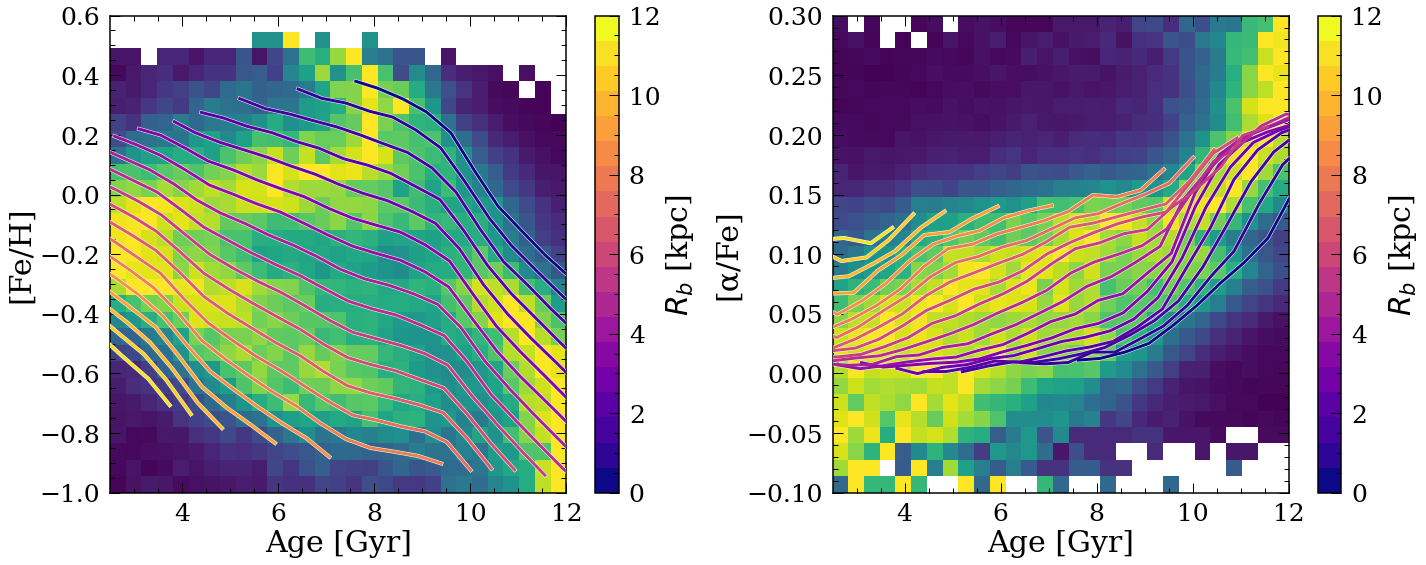

In [67]:
sub_tryRb = sub_tryRb.dropna(subset=['ALPHA_FE'])

Rbbin = np.linspace(0,12,20)
color_amr = getcolor(range(len(Rbbin)))

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

yedges, xedges, H = coldensity(sub_tryRb['AGE'], sub_tryRb['FEH'],binsize=30,
          extend=(2.5,12,-1,0.6))

plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)


sub_tryRb = sub_tryRb.sort_values(by='AGE')
age_rbnow, feh_rbnow = movingMed_time(sub_tryRb['AGE'], sub_tryRb['FEH'],
                                     1,1)
#plt.plot(age_rbnow, feh_rbnow, 'r-')

for i in trange(len(Rbbin)-1):
    m = (sub_tryRb['Rb']>Rbbin[i])&(sub_tryRb['Rb']<Rbbin[i+1])
    age_amr_all, feh_amr_all = sub_tryRb['AGE'].values[m], sub_tryRb['FEH'].values[m]
    age_amr_all, feh_amr_all = zip(*sorted(zip(age_amr_all, feh_amr_all)))
    age_amr_all, feh_amr_all = np.array(age_amr_all), np.array(feh_amr_all)
    age_amr, feh_amr = movingMed_time(age_amr_all, feh_amr_all,
                                     1,0.5)
    plt.plot(age_amr, feh_amr, '-', color=color_amr[i], linewidth=3,zorder=10)
    plt.plot(age_amr, feh_amr, '-', color='w', linewidth=4,zorder=9)
    plt.xlim([2.5,12])
    plt.ylim([-1,0.6])
plt.scatter(-100,-100, c=0, vmin=min(Rbbin), vmax=max(Rbbin), 
            cmap=plt.get_cmap('plasma', len(Rbbin)-1))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')


plt.subplot(1,2,2)

yedges, xedges, H = coldensity(sub_tryRb['AGE'], sub_tryRb['ALPHA_FE'],binsize=30,
          extend=(2.5,12,-0.1,0.3))

plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)


for i in trange(len(Rbbin)-1):
    m = (sub_tryRb['Rb']>Rbbin[i])&(sub_tryRb['Rb']<Rbbin[i+1])
    age_amr_all, feh_amr_all = sub_tryRb['AGE'].values[m], sub_tryRb['ALPHA_FE'].values[m]
    age_amr_all, feh_amr_all = zip(*sorted(zip(age_amr_all, feh_amr_all)))
    age_amr_all, feh_amr_all = np.array(age_amr_all), np.array(feh_amr_all)
    age_amr, feh_amr = movingMed_time(age_amr_all, feh_amr_all,
                                     1,0.5)
    #feh_amr = gaussian_filter(feh_amr, 0.5)
    plt.plot(age_amr, feh_amr, '-', color=color_amr[i], linewidth=3,zorder=10)
    plt.plot(age_amr, feh_amr, '-', color='w', linewidth=4,zorder=9)
    plt.xlim([2.5,12])
    plt.ylim([-0.1,0.3])
plt.scatter(-100,-100, c=0, vmin=min(Rbbin), vmax=max(Rbbin), 
            cmap=plt.get_cmap('plasma', len(Rbbin)-1))
plt.xlabel('Age [Gyr]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.tight_layout()

plt.savefig('Figures/eps/afe_evol',bbox_inches='tight')
plt.savefig('Figures/afe_evol.png',bbox_inches='tight')



In [68]:
"""plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['ALPHA_FE'], C=sub_tryRb['Rb'],
          extent=(2.5,14,-0.1,0.3), gridsize=50, mincnt=1,
          vmin=0, vmax=15, cmap='plasma')
plt.xlabel('Age [Gyr]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.tight_layout()"""

"plt.figure(figsize=(10,8))\nplt.hexbin(sub_tryRb['AGE'], sub_tryRb['ALPHA_FE'], C=sub_tryRb['Rb'],\n          extent=(2.5,14,-0.1,0.3), gridsize=50, mincnt=1,\n          vmin=0, vmax=15, cmap='plasma')\nplt.xlabel('Age [Gyr]')\nplt.ylabel('[α/Fe]')\ncb = plt.colorbar()\ncb.set_label('$R_b$ [kpc]')\nplt.tight_layout()"

In [69]:
"""agebin = np.linspace(0,12,11)
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

allext = [-1,0.5,-0.05,0.3]

fig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.2},
                          figsize=(30,20))



sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<0.5].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-8.2)<0.5].reset_index(drop=True)

axarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

axarr[0,0].plot(meanfeh, meanafe, 'r--', linewidth=4, label='After Correction')
axarr[0,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,0].set_title('6 kpc < $R_b$ < 9 kpc', fontsize=30)
# plot old Rb
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,0].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30, label='Before Correction')        
#axarr[0,0].legend()





axarr[0,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
axarr[0,1].set_title('$R_b$ > 10 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30, label='Before Correction')        


axarr[0,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'],
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,2].set_title('$R_b$ < 5 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30, label='Before Correction')        








#sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-10)<0.5].reset_index(drop=True)
#sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-10)<0.5].reset_index(drop=True)

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])>10].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[sub_rbir['R_GUIDING']>10].reset_index(drop=True)


axarr[1,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'r--', linewidth=4)
im = axarr[1,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30)        




axarr[1,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'],
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30)    


axarr[1,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=250)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'w--o', linewidth=4, markersize=30)   


#axarr[0,0].set_xticks([])
#axarr[0,1].set_xticks([])
#axarr[0,2].set_xticks([])
#axarr[1,1].set_xticks([])
#axarr[1,2].set_xticks([])

#axarr[0,0].set_yticks([])
#axarr[0,1].set_yticks([])
#axarr[0,2].set_yticks([])
#axarr[1,1].set_yticks([])
#axarr[1,2].set_yticks([])


axarr[0,0].set_xlim([allext[0], allext[1]])
axarr[0,1].set_xlim([allext[0], allext[1]])
axarr[0,2].set_xlim([allext[0], allext[1]])
axarr[1,0].set_xlim([allext[0], allext[1]])
axarr[1,1].set_xlim([allext[0], allext[1]])
axarr[1,2].set_xlim([allext[0], allext[1]])

axarr[0,0].set_ylim([allext[2], allext[3]])
axarr[0,1].set_ylim([allext[2], allext[3]])
axarr[0,2].set_ylim([allext[2], allext[3]])
axarr[1,0].set_ylim([allext[2], allext[3]])
axarr[1,1].set_ylim([allext[2], allext[3]])
axarr[1,2].set_ylim([allext[2], allext[3]])


fig.text(0.45, 0.08, '[Fe/H]', fontsize=40)
fig.text(0.03, 0.45, '[α/Fe]', fontsize=40, rotation='vertical')

fig.text(0.07, 0.2, '$R_g$ > 10. kpc', fontsize=30, rotation='vertical')
fig.text(0.07, 0.6, '7.7 kpc < $R_g$ < 8.7 kpc', fontsize=30, rotation='vertical')


cb_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'vertical')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

plt.savefig('Figures/eps/timeevol',bbox_inches='tight')
plt.savefig('Figures/timeevol.png',bbox_inches='tight')"""

"agebin = np.linspace(0,12,11)\nmeanfeh = np.zeros(len(agebin)-1)\nmeanafe = np.zeros(len(agebin)-1)\n\nallext = [-1,0.5,-0.05,0.3]\n\nfig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.2},\n                          figsize=(30,20))\n\n\n\nsub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<0.5].reset_index(drop=True)\nsub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-8.2)<0.5].reset_index(drop=True)\n\naxarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], \n          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, \n                  mincnt=1, vmin=1, vmax=250)\nfor i in range(len(agebin)-1):\n    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])\n    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)\n    if sum(m)<10:\n        meanfeh[i] = np.nan\n        meanafe[i] = np.nan\n    else:\n        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())\n        meanafe[i] = np.median(pd.Series(

In [70]:
"""agebin = np.linspace(2,12,14)
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

allext = [-1,0.5,-0.05,0.3]

fig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.2},
                          figsize=(30,20))



sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<0.5].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-8.2)<0.5].reset_index(drop=True)

axarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

axarr[0,0].plot(meanfeh, meanafe, 'r--', linewidth=4, label='After Correction')
axarr[0,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,0].set_title('6 kpc < $R_b$ < 9 kpc', fontsize=30)
# plot old Rb
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,0].plot(meanfeh, meanafe, 'w--', linewidth=4, label='Before Correction')        
axarr[0,0].legend()





axarr[0,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
axarr[0,1].set_title('$R_b$ > 10 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'w--', linewidth=4, label='Before Correction')        


axarr[0,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'],
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,2].set_title('$R_b$ < 5 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'w--', linewidth=4, label='Before Correction')        








#sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-10)<0.5].reset_index(drop=True)
#sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-10)<0.5].reset_index(drop=True)

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<5].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[sub_rbir['R_GUIDING']<5].reset_index(drop=True)


axarr[1,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'r--', linewidth=4)
im = axarr[1,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'w--', linewidth=4)        




axarr[1,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'],
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'w--', linewidth=4)    


axarr[1,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, 
                  mincnt=1, vmin=1, vmax=300)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=min(agebin), vmax=max(agebin), cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'w--', linewidth=4)   


#axarr[0,0].set_xticks([])
#axarr[0,1].set_xticks([])
#axarr[0,2].set_xticks([])
#axarr[1,1].set_xticks([])
#axarr[1,2].set_xticks([])

#axarr[0,0].set_yticks([])
#axarr[0,1].set_yticks([])
#axarr[0,2].set_yticks([])
#axarr[1,1].set_yticks([])
#axarr[1,2].set_yticks([])


axarr[0,0].set_xlim([allext[0], allext[1]])
axarr[0,1].set_xlim([allext[0], allext[1]])
axarr[0,2].set_xlim([allext[0], allext[1]])
axarr[1,0].set_xlim([allext[0], allext[1]])
axarr[1,1].set_xlim([allext[0], allext[1]])
axarr[1,2].set_xlim([allext[0], allext[1]])

axarr[0,0].set_ylim([allext[2], allext[3]])
axarr[0,1].set_ylim([allext[2], allext[3]])
axarr[0,2].set_ylim([allext[2], allext[3]])
axarr[1,0].set_ylim([allext[2], allext[3]])
axarr[1,1].set_ylim([allext[2], allext[3]])
axarr[1,2].set_ylim([allext[2], allext[3]])


fig.text(0.45, 0.08, '[Fe/H]', fontsize=40)
fig.text(0.03, 0.45, '[α/Fe]', fontsize=40, rotation='vertical')

fig.text(0.07, 0.2, '$R_g$ < 5 kpc', fontsize=30, rotation='vertical')
fig.text(0.07, 0.6, '7.7 kpc < $R_g$ < 8.7 kpc', fontsize=30, rotation='vertical')


cb_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'vertical')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

#plt.savefig('Figures/eps/timeevol',bbox_inches='tight')
#plt.savefig('Figures/timeevol.png',bbox_inches='tight')"""

"agebin = np.linspace(2,12,14)\nmeanfeh = np.zeros(len(agebin)-1)\nmeanafe = np.zeros(len(agebin)-1)\n\nallext = [-1,0.5,-0.05,0.3]\n\nfig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0.2, 'wspace': 0.2},\n                          figsize=(30,20))\n\n\n\nsub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<0.5].reset_index(drop=True)\nsub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R_GUIDING']-8.2)<0.5].reset_index(drop=True)\n\naxarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], \n          extent=(allext[0], allext[1], allext[2], allext[3]), gridsize=50, \n                  mincnt=1, vmin=1, vmax=300)\nfor i in range(len(agebin)-1):\n    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])\n    m = m&(abs(sub_tryRb_sn['Rb']-7.5)<1.5)\n    if sum(m)<10:\n        meanfeh[i] = np.nan\n        meanafe[i] = np.nan\n    else:\n        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())\n        meanafe[i] = np.median(pd.Series(

In [71]:
"""mincnstars = 50
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-7.5)<1.5].reset_index(drop=True)

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=10)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<mincnstars:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color=colors[j], linewidth=3,
            zorder=10, markersize=10)
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color='w', linewidth=4,
            zorder=9, markersize=11)

    
for i in range(len(agebin)-1):
    if i==4 or i ==5:
        plt.plot(meanfeh[i,:], meanafe[i,:], 'o', color='w',zorder=400,
                markersize=10, alpha=0.8)


plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])

plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([-1,0.5])
plt.ylim([-0.1,0.3])
plt.title('6 kpc < $R_g$ < 9 kpc', fontsize=25)
#plt.title('7.7 kpc < Rb_corrected < 8.7 kpc', fontsize=25)




Rbbin = np.linspace(0,11,5)
colors = getcolor(range(len(Rbbin)-1))
sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])>10].reset_index(drop=True)

plt.subplot(2,2,2)
plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1,0.5,-0.1,0.3), gridsize=30, mincnt=10)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<mincnstars:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color=colors[j], linewidth=3,
            zorder=10, markersize=10)
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color='w', linewidth=4,
            zorder=9, markersize=11)

    

for i in range(len(agebin)-1):
    if ((agebin[i]/2+agebin[i+1]/2)>8) & ((agebin[i]/2+agebin[i+1]/2)<10):
        plt.plot(meanfeh[i,:], meanafe[i,:], 'o', color='w',zorder=400,
                markersize=10, alpha=0.8)




plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])

plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([-1,0.5])
plt.ylim([-0.1,0.3])
plt.title('$R_g$ > 10 kpc', fontsize=25)






sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<5].reset_index(drop=True)

plt.subplot(2,2,3)
plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1,0.5,-0.1,0.3), gridsize=30, mincnt=10)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<mincnstars:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color=colors[j], linewidth=3,
            zorder=10, markersize=10)
    plt.plot(meanfeh[:,j], meanafe[:,j], 'o-', color='w', linewidth=4,
            zorder=9, markersize=11)
    
for i in range(len(agebin)-1):
    if ((agebin[i]/2+agebin[i+1]/2)>8) & ((agebin[i]/2+agebin[i+1]/2)<10):
        plt.plot(meanfeh[i,:], meanafe[i,:], 'o', color='w',zorder=400,
                markersize=10, alpha=0.8)



plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([-1,0.5])
plt.ylim([-0.1,0.3])
plt.title('$R_g$ < 5 kpc', fontsize=25)







#Rbbin = np.linspace(0,15,16)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
          extent=(-1,0.5,-0.1,0.3),
           C = sub_tryRb['Rb'], gridsize=30, mincnt=10,
          vmin=0,vmax=9,cmap=plt.get_cmap('plasma',10))

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([-1,0.5])
plt.ylim([-0.1,0.3])
plt.title('All', fontsize=25)

plt.tight_layout()


plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')
"""

"mincnstars = 50\nimport warnings\nwarnings.filterwarnings('ignore')\ndef drawArrow(A, B, colors):\n    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],\n              head_width=0.01, head_length=0.03, \n              length_includes_head = True,\n              color=colors)\n    \nagebin = np.linspace(2,15,10)\nRbbin = np.linspace(0,11,12)\n\ncolors = getcolor(range(len(Rbbin)-1))\n\nsub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-7.5)<1.5].reset_index(drop=True)\n\nplt.figure(figsize=(20,16))\nplt.subplot(2,2,1)\nplt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], \n          extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=10)\n\nmeanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))\nmeanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))\n\nfor j in range(len(Rbbin)-1):\n    for i in range(len(agebin)-1):\n        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])\n        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])\n        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])\n        

In [72]:
range(len(kc)+1)

range(0, 7)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


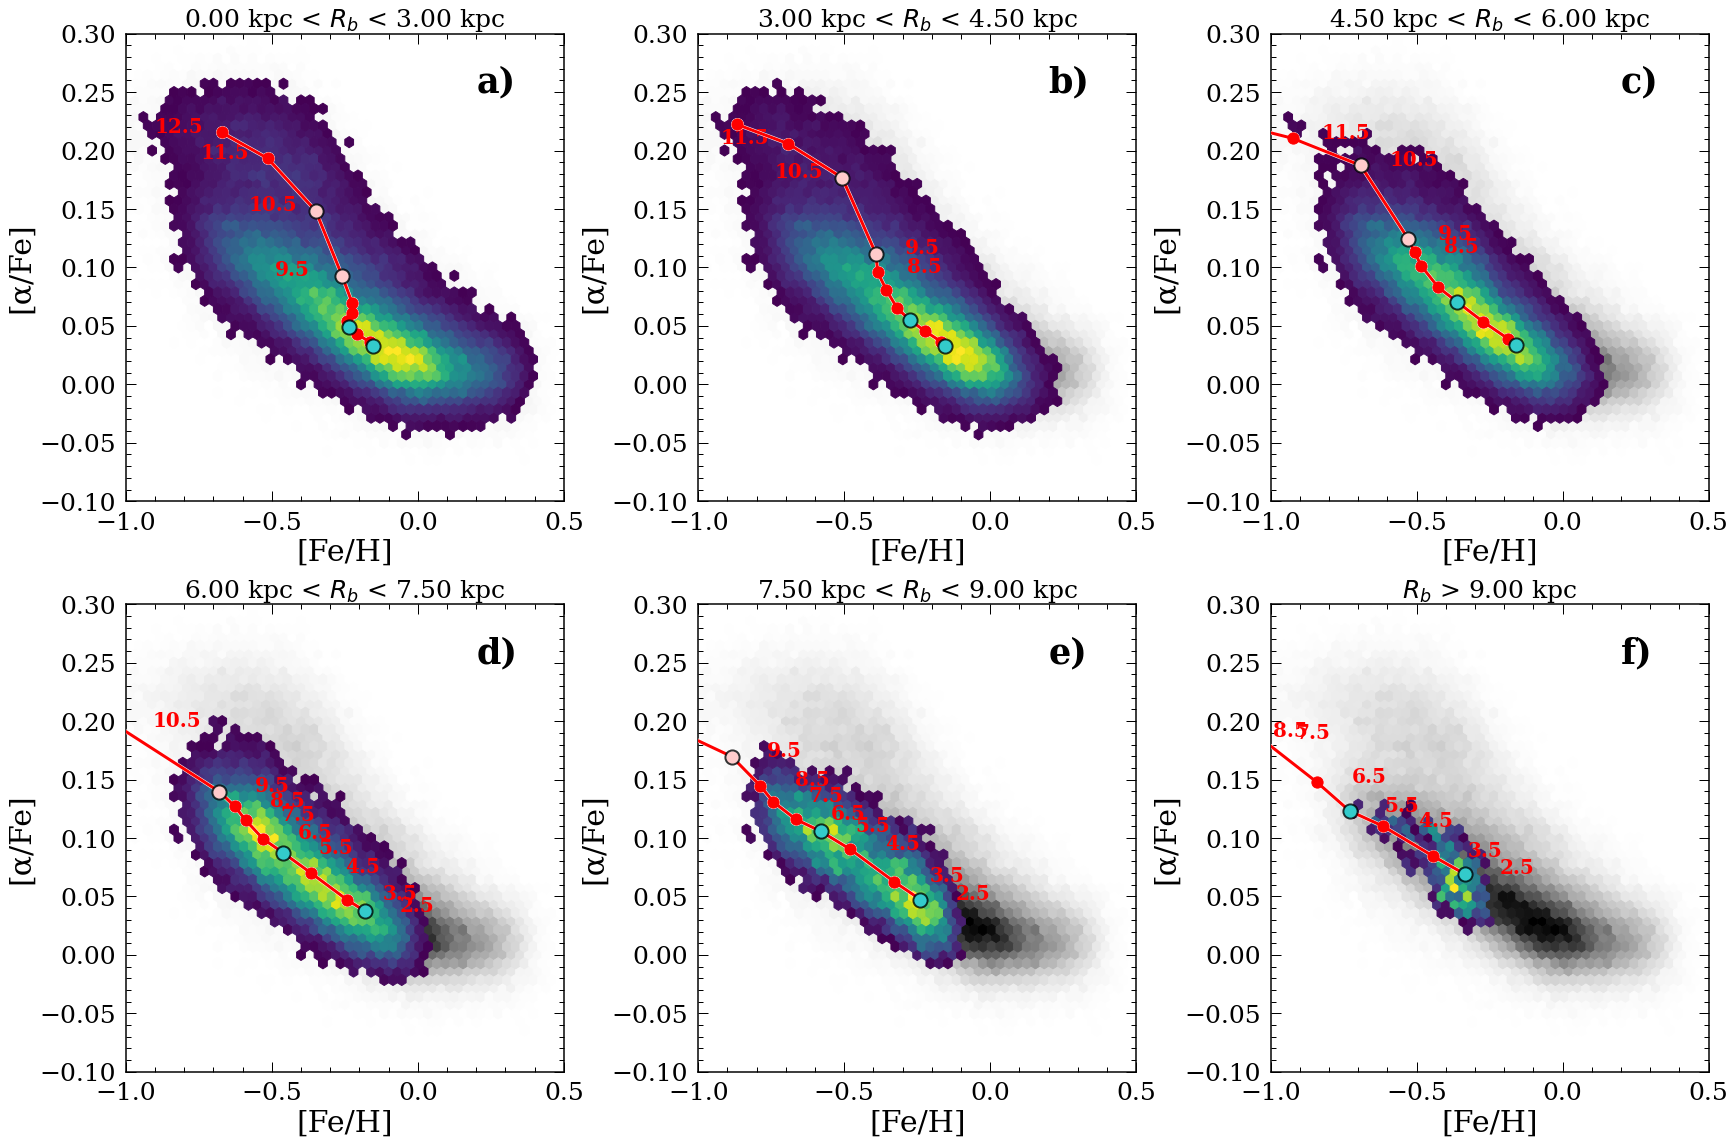

In [73]:
plt.figure(figsize=(8*3,8*2))
Nocut = 20
agebin = np.linspace(2,13,12)
rbrange = 0.5

kc = [0,3,4.5,6,7.5,9]
labellookup = {0:'a)',1:'b)',2:'c)',3:'d)',4:'e)',5:'f)'}

sub_tryRb = pd.read_pickle('NewRb.pkl')
sub_tryRb = sub_tryRb.loc[sub_tryRb['Rb_err']<1]
for i in range(len(kc)):
    
    #sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-k)<rbrange].reset_index(drop=True)
    
    if i==5:
        sub_tryRb_sn = sub_tryRb.loc[sub_tryRb['Rb']>kc[-1]].reset_index(drop=True)
        #sub_tryRb_sn_rbin = sub_tryRb.loc[sub_tryRb['R_GUIDING']>kc[-1]].reset_index(drop=True)
    else:
        sub_tryRb_sn = sub_tryRb.loc[(sub_tryRb['Rb'])>kc[i]].reset_index(drop=True)
        #sub_tryRb_sn = sub_tryRb_sn.loc[(sub_tryRb_sn['Rb'])<kc[i+1]].reset_index(drop=True)
    #sub_tryRb_sn_rbin = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-k)<rbrange].reset_index(drop=True)
    
    plt.subplot(2,3,i+1)
        
    plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=1,
              cmap='binary')
    
    if i<3:
        plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
              extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=Nocut)
    else:
        plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
              extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=Nocut)

    meanfeh = np.zeros(len(agebin)-1)
    meanafe = np.zeros(len(agebin)-1)
    
    meanfeh_now = np.zeros(len(agebin)-1)
    meanafe_now = np.zeros(len(agebin)-1)
    if i==5:
        plt.title('$R_b$ > %.2f kpc'%(kc[-1]), fontsize=25)
    else:
        plt.title('%.2f kpc < $R_b$ < %.2f kpc'%(kc[i],kc[i+1]), fontsize=25)
    for k in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
        if sum(m)<10:
            meanfeh[k] = np.nan
            meanafe[k] = np.nan
        else:
            meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    
    """for k in range(len(agebin)-1):
        m = (sub_tryRb_sn_rbin['AGE']>agebin[k])&(sub_tryRb_sn_rbin['AGE']<agebin[k+1])
        if sum(m)<10:
            meanfeh_now[k] = np.nan
            meanafe_now[k] = np.nan
        else:
            meanfeh_now[k] = np.median(pd.Series(sub_tryRb_sn_rbin['FEH'].values[m]).dropna())
            meanafe_now[k] = np.median(pd.Series(sub_tryRb_sn_rbin['ALPHA_FE'].values[m]).dropna())
    """
    
    plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=3,
            zorder=10, markersize=15/4*3)
    plt.plot(meanfeh, meanafe, 'o-', color='w', linewidth=4,
            zorder=9, markersize=12)
    
    #plt.plot(meanfeh_now, meanafe_now, 'o-', color='w', linewidth=4,
    #        zorder=9, markersize=12)
    
    plt.xlabel('[Fe/H]')
    plt.ylabel('[α/Fe]')
    plt.xlim([-1,0.5])
    plt.ylim([-0.1,0.3])
    
    n = agebin[:-1]/2+agebin[1:]/2
    if i==1:
        for k, txt in enumerate(n):
            if txt>12:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]-0.25, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
                
            elif txt>10:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]-0.23, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
                
            elif txt>8:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.1, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
    elif i==0:
        for k, txt in enumerate(n):
            if txt>9:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]-0.23, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
            
    elif i==2:
        for k, txt in enumerate(n):
            if txt>8:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.1, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
            
            
    else:
        for k, txt in enumerate(n):
            if txt>11:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
            else:
                plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
                 fontsize=20,color='r', weight='bold')
        


    for k in range(len(agebin)-1):
        if ((agebin[k]/2+agebin[k+1]/2)>9) & ((agebin[k]/2+agebin[k+1]/2)<11):
            #print(agebin[i]/2+agebin[i+1]/2)
            plt.scatter(meanfeh[k], meanafe[k],s=200,color='w',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)
            
        if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
            plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)
            
        if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
            plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

    plt.annotate(labellookup[i], (0.2,0.25),
                 fontsize=35,color='k', weight='bold')

plt.tight_layout()

plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')



In [130]:
elements = pd.read_csv('Xiang_elements.csv')
sub_tryRb = pd.merge(sub_tryRb, elements[['SOURCE_ID','MG_FE','MG_FE_FLAG']],
                     left_on='SOURCE_ID',right_on='SOURCE_ID',how='left')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


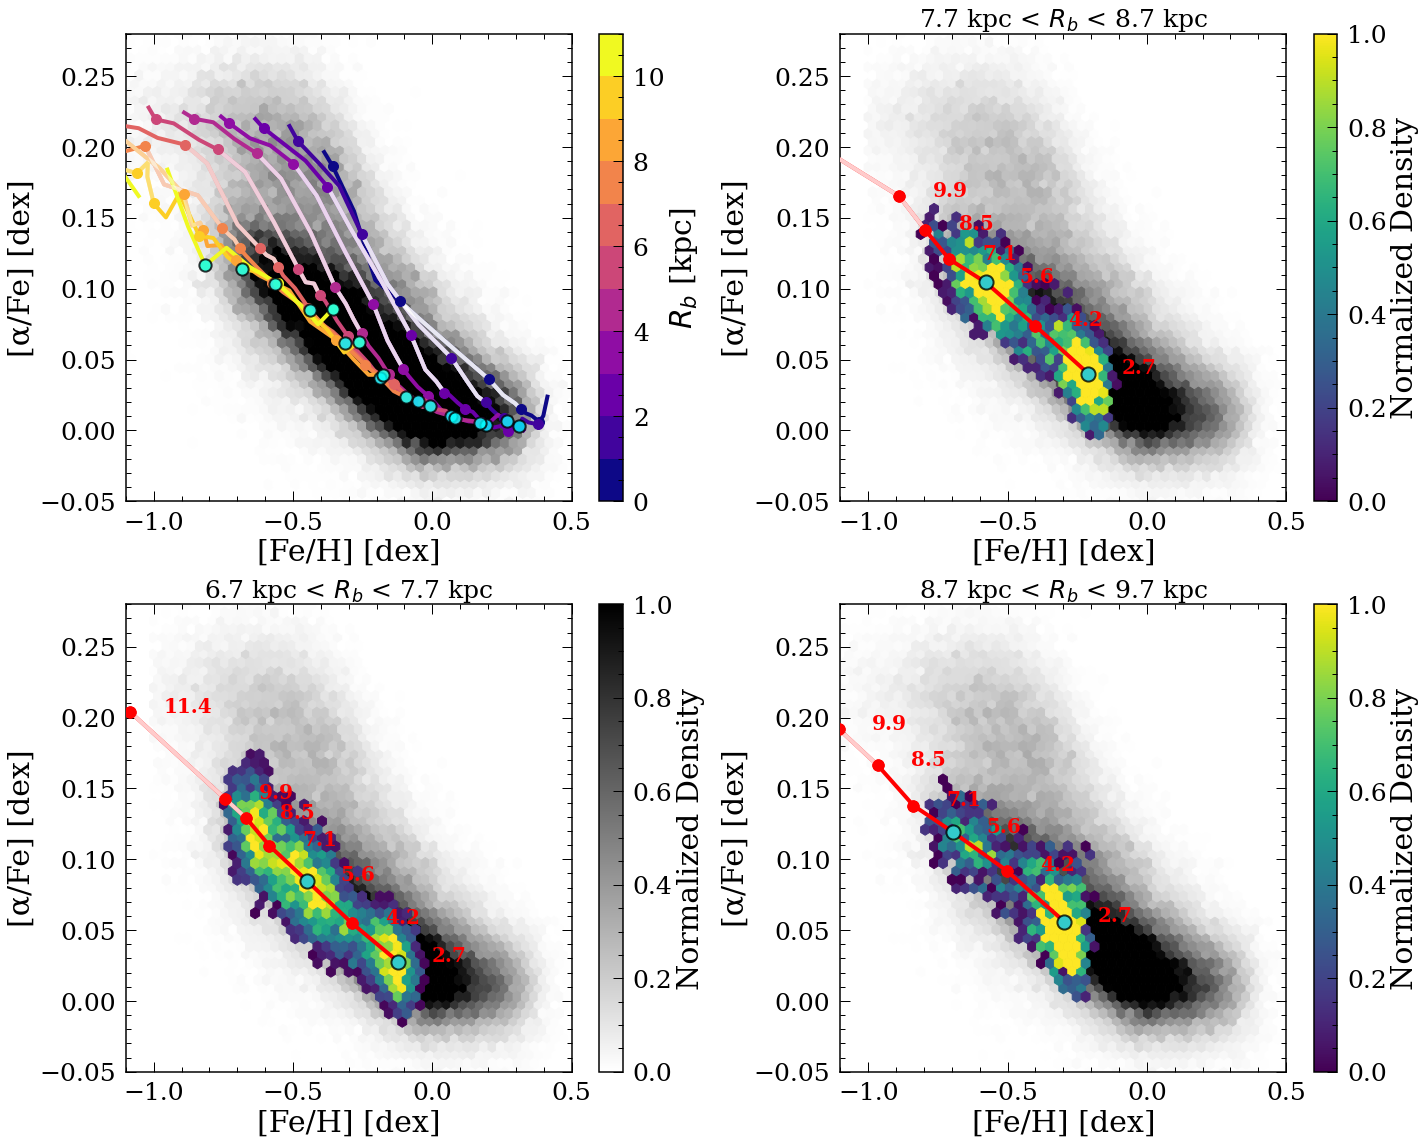

In [123]:
cutbin = 50
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-8.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(20,16))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=Nocut,
               vmax=50)
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(),50, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('7.7 kpc < $R_b$ < 8.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-9.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=10,
               vmax=30)

cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), 30, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('8.7 kpc < $R_b$ < 9.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-7.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=20,
          vmax=80)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('6.7 kpc < $R_b$ < 7.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb

plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=200)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):
        """if ((agebin_p[k]/2+agebin_p[k+1]/2)>8) & ((agebin_p[k]/2+agebin_p[k+1]/2)<11):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='w',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)"""

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)



plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')




In [131]:
m = (sub_tryRb['MG_FE_FLAG']==1)

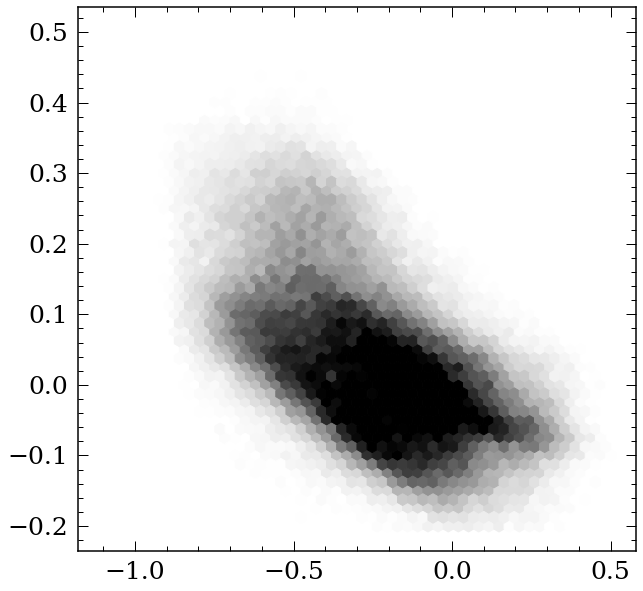

In [135]:
plt.hexbin(sub_tryRb['FEH'][m], sub_tryRb['MG_FE'][m], 
              extent=(-1.1,0.5,-0.2,0.5), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


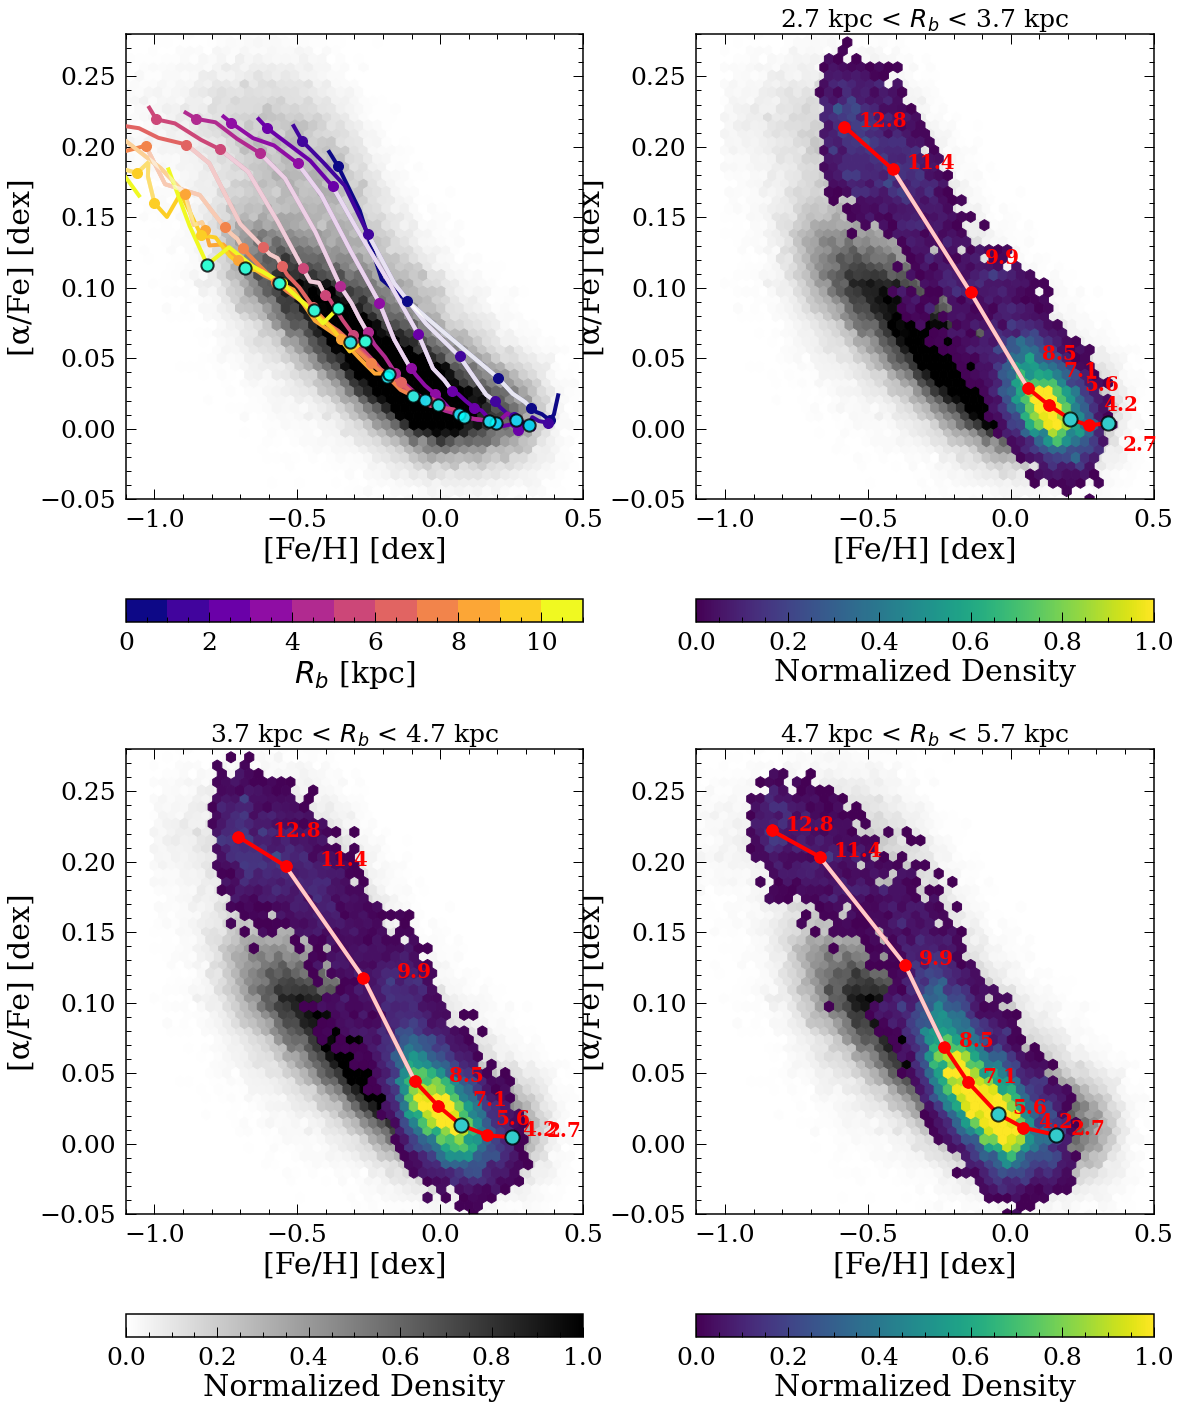

In [107]:
cutbin = 50
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-2.2)<0.5].reset_index(drop=True)

plt.figure(figsize=(16,20))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=5,
               vmax=120)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(),120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('2.7 kpc < $R_b$ < 3.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
n = agebin[:-1]/2+agebin[1:]/2        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        elif txt<4:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]-0.02), 
             fontsize=20,color='r', weight='bold')
        elif txt<5:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.01), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]+0.02), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-4.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
    
hb = plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=5,
               vmax=120)

cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 120, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('4.7 kpc < $R_b$ < 5.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)

for k in range(len(agebin)-1):
    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.05, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-3.2)<0.5].reset_index(drop=True)

plt.subplot(2,2,3)
hb = plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)
cb = plt.colorbar(location='bottom')
cb.set_ticks(np.linspace(hb.get_array().min(), 300, 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')

plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
          extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=5,
          vmax=150)

meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)

meanfeh_now = np.zeros(len(agebin)-1)
meanafe_now = np.zeros(len(agebin)-1)
plt.title('3.7 kpc < $R_b$ < 4.7 kpc', fontsize=25)
for k in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[k])&(sub_tryRb_sn['AGE']<agebin[k+1])
    if sum(m)<10:
        meanfeh[k] = np.nan
        meanafe[k] = np.nan
    else:
        meanfeh[k] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[k] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())


plt.plot(meanfeh, meanafe, 'o-', color='r', linewidth=4,
        zorder=10, markersize=15/4*3)
plt.plot(meanfeh, meanafe, 'o', color='r', linewidth=4,
        zorder=12, markersize=15/4*3)
ml = ((agebin[1:]/2+agebin[:-1]/2)>8) & ((agebin[1:]/2+agebin[:-1]/2)<11.5)
plt.plot(meanfeh[ml], meanafe[ml], 'w-',zorder=11,
                    alpha=0.8, linewidth=4)
        
for k in range(len(agebin)-1):


    if ((agebin[k]/2+agebin[k+1]/2)>5) & ((agebin[k]/2+agebin[k+1]/2)<6):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)

    if ((agebin[k]/2+agebin[k+1]/2)>2) & ((agebin[k]/2+agebin[k+1]/2)<3):
        plt.scatter(meanfeh[k], meanafe[k],s=200,color='cyan',zorder=400,
                    alpha=0.8, edgecolor='k',linewidth=2)
        
for k, txt in enumerate(n):
        if txt>11:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
        else:
            plt.annotate('%.1f'%(float(txt)), (meanfeh[k]+0.12, meanafe[k]), 
             fontsize=20,color='r', weight='bold')
plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])






plt.subplot(2,2,1)
agebin = np.linspace(2,15,28)
Rbbin = np.linspace(0,11,12)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb

plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1.1,0.5,-0.05,0.28), gridsize=50, mincnt=1,
              cmap='binary',vmax=300)

meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))


for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<10:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=8, markersize=10)  
    
    plt.plot(meanfeh[::3,j], meanafe[::3,j], 'o', color=colors[j], linewidth=4,
                    zorder=10, markersize=10)
    
    m3 = (((agebin[:-1]/2+agebin[1:]/2)>8)&((agebin[:-1]/2+agebin[1:]/2)<11))
    plt.plot(meanfeh[m3], meanafe[m3],color='w',zorder=9,
                    alpha=0.2,linewidth=4)

    
    agebin_p = agebin[::3]
    feh_p = meanfeh[::3,j]
    afe_p = meanafe[::3,j]
    
    for k in range(len(agebin_p)-1):

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>5) & ((agebin_p[k]/2+agebin_p[k+1]/2)<6):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)

        if ((agebin_p[k]/2+agebin_p[k+1]/2)>2) & ((agebin_p[k]/2+agebin_p[k+1]/2)<3):
            plt.scatter(feh_p[k], afe_p[k],s=150,color='cyan',zorder=400,
                        alpha=0.8, edgecolor='k',linewidth=2)



plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
plt.xlim([-1.1,0.5])
plt.ylim([-0.05,0.28])
plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('[Fe/H] [dex]')
plt.ylabel('[α/Fe] [dex]')
cb = plt.colorbar(location='bottom')
cb.set_label('$R_b$ [kpc]')

plt.tight_layout()


plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')





In [860]:
np.linspace(2,15,10)[:-1]/2+np.linspace(2,15,10)[1:]/2

array([ 2.72222222,  4.16666667,  5.61111111,  7.05555556,  8.5       ,
        9.94444444, 11.38888889, 12.83333333, 14.27777778])

In [873]:
agebin_p[:-1]/2+agebin_p[1:]/2, (agebin[:-1]/2+agebin[1:]/2)[m3]

(array([ 2.72222222,  4.16666667,  5.61111111,  7.05555556,  8.5       ,
         9.94444444, 11.38888889, 12.83333333, 14.27777778]),
 array([ 9.46296296,  9.94444444, 10.42592593, 10.90740741]))

In [878]:
sub_tryRb_sn['U']

0        142.269928
1         15.166187
2         22.814949
3         88.936020
4         36.390251
            ...    
19300     26.036991
19301     46.608669
19302     17.717119
19303     44.305355
19304     39.221607
Name: U, Length: 19305, dtype: float32

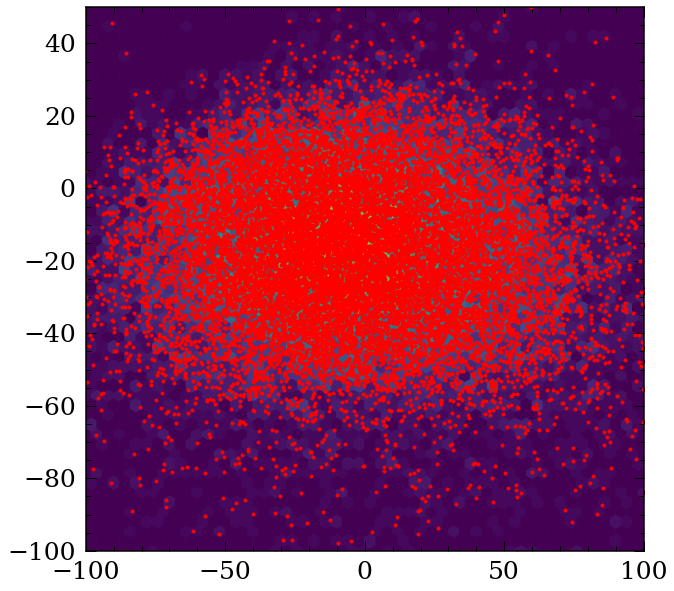

In [905]:
sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-8.2)<0.5].reset_index(drop=True)
plt.hexbin(sub_tryRb_sn['U'], sub_tryRb_sn['V'],
          extent=(-100,100,-100,50),gridsize=50)
plt.xlim([-100,100])
plt.ylim([-100,50])

m = ((sub_tryRb_sn['AGE']-5.6)<1)
plt.plot(sub_tryRb_sn['U'][m], sub_tryRb_sn['V'][m], 'r.')

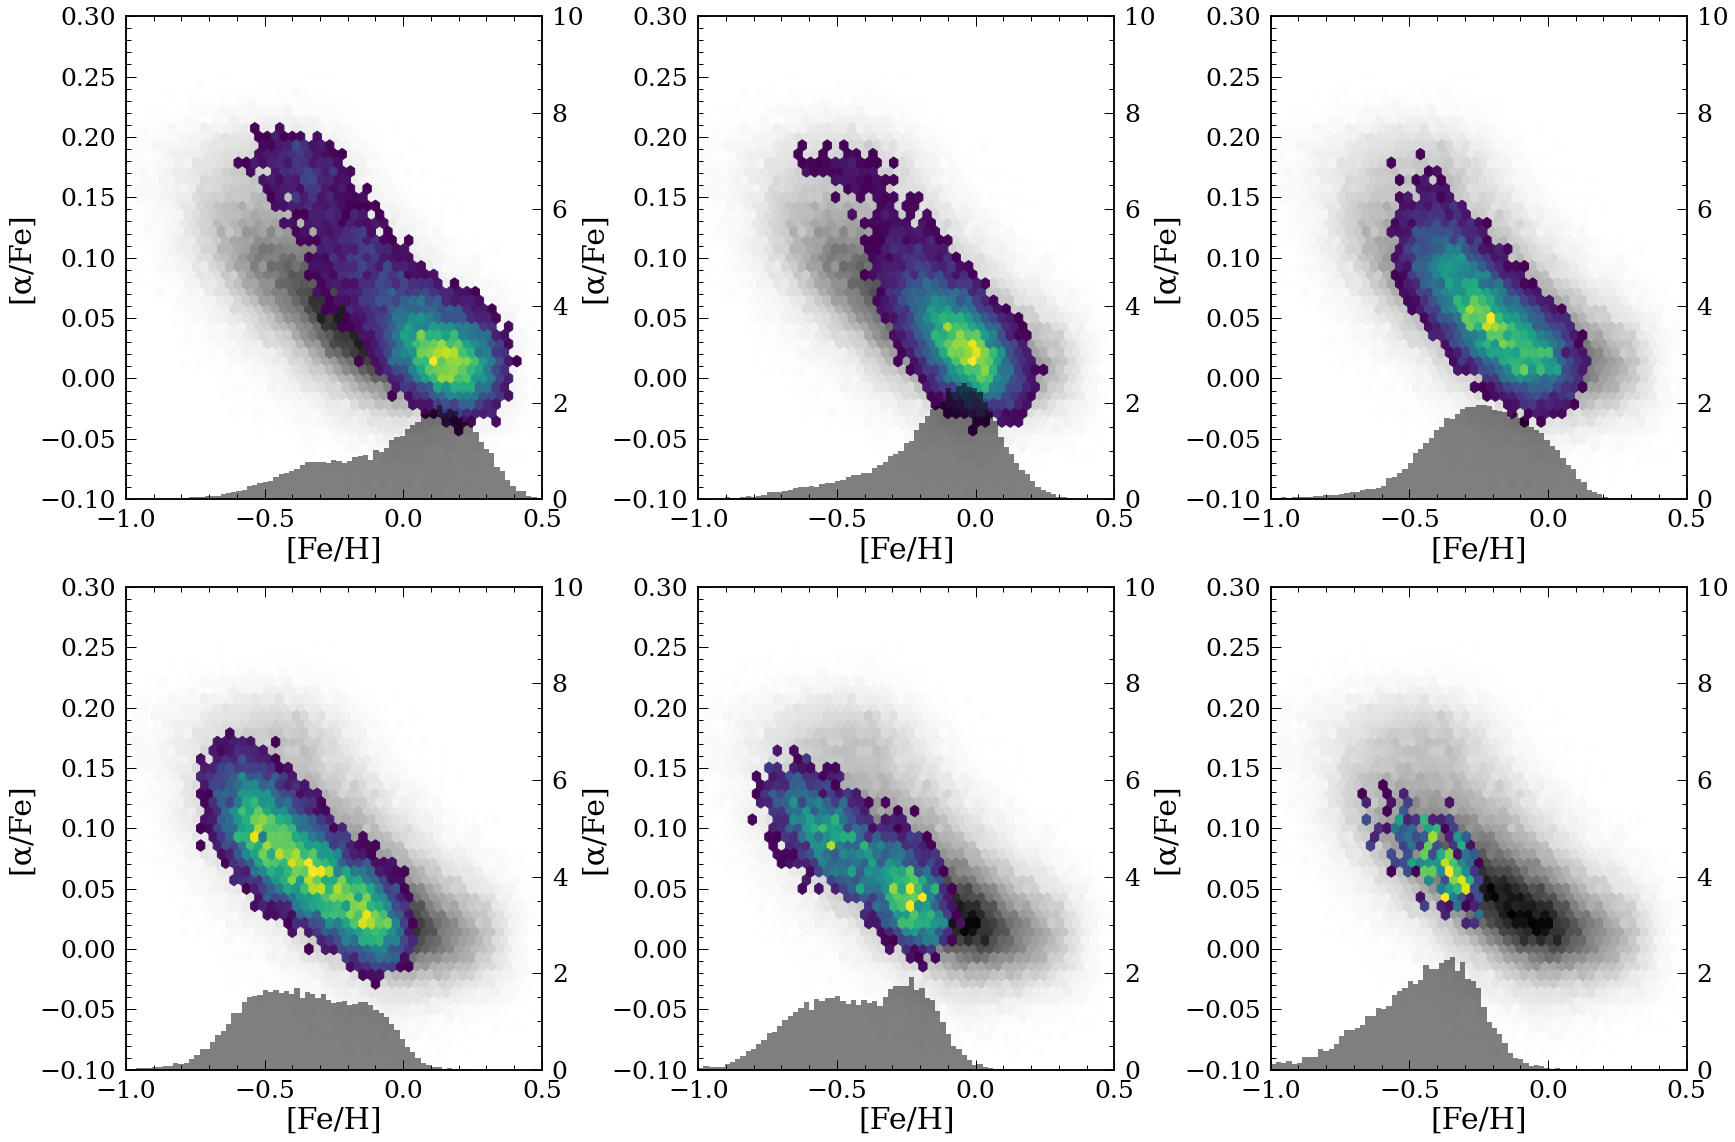

In [617]:
plt.figure(figsize=(8*3,8*2))
Nocut = 20
agebin = np.linspace(2,13,12)
rbrange = 0.5

kc = [0,3,4.5,6,7.5,9]
labellookup = {0:'a)',1:'b)',2:'c)',3:'d)',4:'e)',5:'f)'}

sub_tryRb = pd.read_pickle('NewRb.pkl')
sub_tryRb = sub_tryRb.loc[sub_tryRb['AGE_ERR']<1]
sub_tryRb = sub_tryRb.loc[sub_tryRb['FEH_ERR']<0.1]
sub_tryRb = sub_tryRb.loc[sub_tryRb['ALPHA_FE']<0.2]
sub_tryRb = sub_tryRb.loc[sub_tryRb['Rb_err']<10].reset_index(drop=True)

sub_tryRb['AGE'] = np.array([np.random.normal(sub_tryRb['AGE'].values[k], 
                                              sub_tryRb['AGE_ERR'].values[k]) for k in range(len(sub_tryRb))], dtype=float)
sub_tryRb['Rb'] = np.array([np.random.normal(sub_tryRb['Rb'].values[k], 
                                              sub_tryRb['Rb_err'].values[k]) for k in range(len(sub_tryRb))], dtype=float)
sub_tryRb['ALPHA_FE'] = np.array([np.random.normal(sub_tryRb['ALPHA_FE'].values[k], 
                                              sub_tryRb['ALPHA_FE_ERR'].values[k]) for k in range(len(sub_tryRb))], dtype=float)
sub_tryRb['FEH'] = np.array([np.random.normal(sub_tryRb['FEH'].values[k], 
                                              sub_tryRb['FEH_ERR'].values[k]) for k in range(len(sub_tryRb))], dtype=float)




for i in range(len(kc)):
    
    #sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['Rb']-k)<rbrange].reset_index(drop=True)
    
    if i==5:
        sub_tryRb_sn = sub_tryRb.loc[sub_tryRb['Rb']>kc[-1]].reset_index(drop=True)
        sub_tryRb_sn_rbin = sub_tryRb.loc[sub_tryRb['R_GUIDING']>kc[-1]].reset_index(drop=True)
    else:
        sub_tryRb_sn = sub_tryRb.loc[(sub_tryRb['Rb'])>kc[i]].reset_index(drop=True)
        sub_tryRb_sn = sub_tryRb_sn.loc[(sub_tryRb_sn['Rb'])<kc[i+1]].reset_index(drop=True)
    #sub_tryRb_sn_rbin = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-k)<rbrange].reset_index(drop=True)
    
    plt.subplot(2,3,i+1)
        
    plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
              extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=1,
              cmap='binary')
    
    plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], 
              extent=(-1,0.5,-0.1,0.3), gridsize=50, mincnt=Nocut)

    
    
    plt.xlabel('[Fe/H]')
    plt.ylabel('[α/Fe]')
    plt.xlim([-1,0.5])
    plt.ylim([-0.1,0.3])
    
    plt.twinx()
    plt.hist(sub_tryRb_sn['FEH'], alpha=0.5, color='k',
            bins=np.linspace(-1,0.5,80),density=True)
    plt.ylim([0,10])
    
    #plt.twiny()
    #plt.hist(sub_tryRb_sn['ALPHA_FE'], alpha=0.5, color='k',
    #        bins=np.linspace(-1,0.5,100),density=True)
    #plt.ylim([0,5])
    
    

plt.tight_layout()

#plt.savefig('Figures/eps/afe_evol_4bin',bbox_inches='tight')
#plt.savefig('Figures/afe_evol_4bin.png',bbox_inches='tight')




Text(0.5, 0, 'Age [Gyr]')

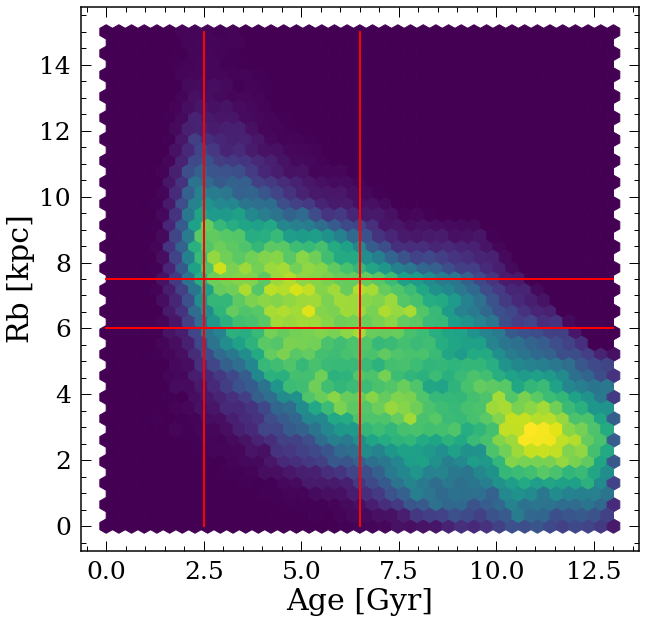

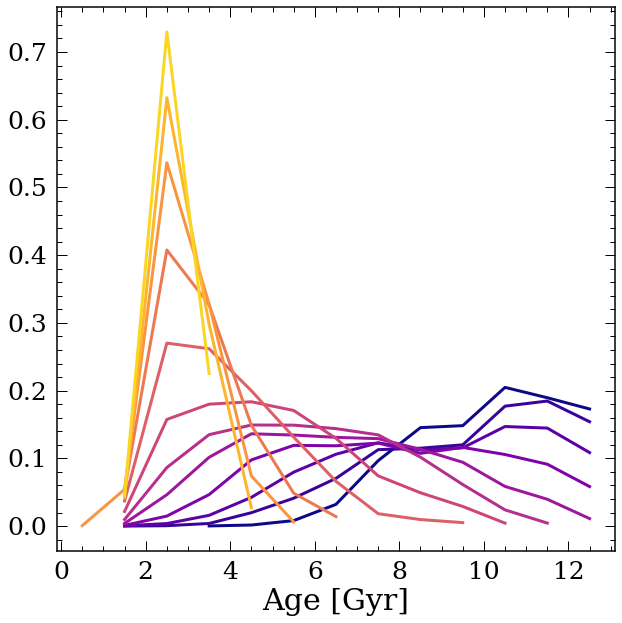

In [629]:
def coldensity(x,y,binsize=50,extend=[]):
    if len(extend)==0:
        extend=(min(x),max(x),min(y),max(y))
    H, yedges, xedges = np.histogram2d(x, y, 
                                bins=(np.linspace(extend[0],extend[1],binsize),
                                        np.linspace(extend[2],extend[3],binsize)))
    for i in trange(len(yedges)-1):
        m = (x>yedges[i])&(x<yedges[i+1])
        H[i,:] = (H[i,:]/sum(m))/max(H[i,:]/sum(m))
    """for i in trange(len(xedges)-1):
        m = (y>xedges[i])&(y<xedges[i+1])
        H[:,i] = (H[:,i]/sum(m))/max(H[:,i]/sum(m))"""

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan

    return yedges, xedges, H.T


plt.figure()
#m = (sub_tryRb['Rb']>6)&(sub_tryRb['Rb']<7.5)&(sub_tryRb['Rb_err']<1)
#plt.hexbin(sub_tryRb['AGE'][m], sub_tryRb['Rb'][m],gridsize=40,
#          extent=(0,13,0,15))
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['Rb'],gridsize=40,
          extent=(0,13,0,15))

"""yedges, xedges, H = coldensity(sub_tryRb['AGE'], sub_tryRb['Rb'],binsize=35,
          extend=(0,13,0,15))
plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)"""

plt.plot([0,13],[6,6],'r-')
plt.plot([0,13],[7.5,7.5],'r-')

plt.plot([6.5,6.5],[0,15],'r-')
plt.plot([2.5,2.5],[0,15],'r-')

plt.xlabel('Age [Gyr]')
plt.ylabel('Rb [kpc]')



plt.figure()
Rbs = np.linspace(0,15,13)

agebin_colors = getcolor(Rbs)

for i in range(len(Rbs)-1):
    m = (sub_tryRb['Rb']>Rbs[i])&(sub_tryRb['Rb']<Rbs[i+1])
    
    fre_g, edg_g = np.histogram(sub_tryRb['AGE'][m], 
                                bins=np.linspace(0,13,14), 
                                density=True)
    

    #fre_g = gaussian_filter(fre_g, 2)

    m2 = (fre_g!=0)
    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)

    
 
plt.xlabel('Age [Gyr]')

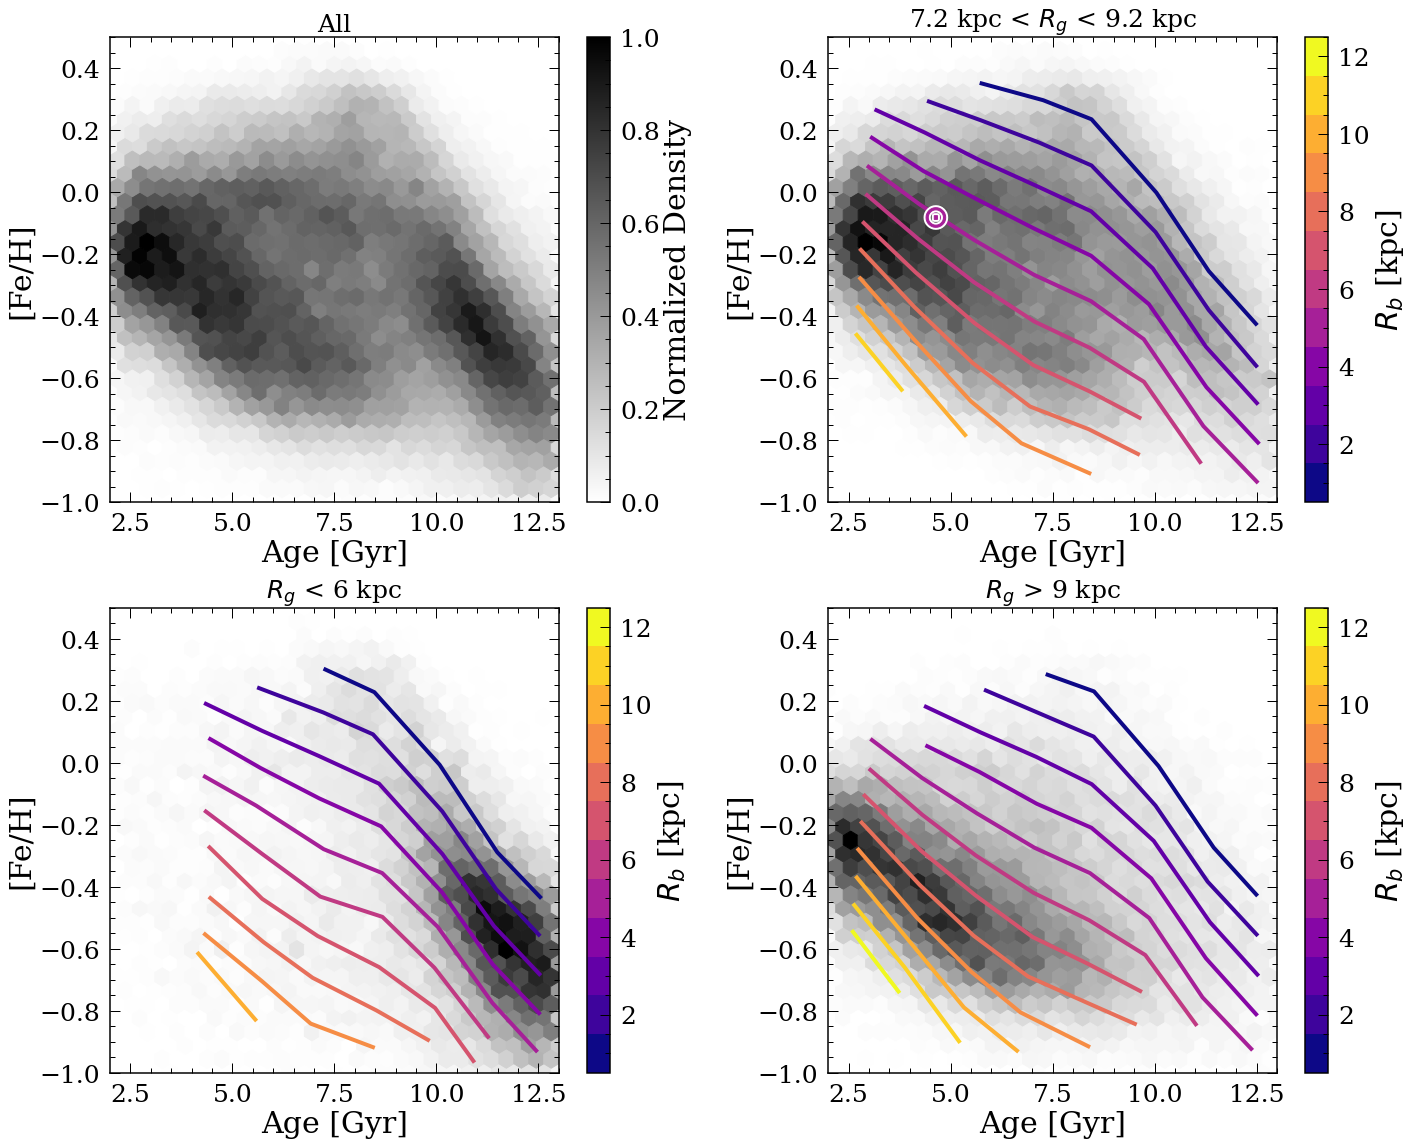

In [638]:
cutbin = 50
import warnings
warnings.filterwarnings('ignore')
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0.5,12.5,13)

colors = getcolor(range(len(Rbbin)-1))

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING']-8.2)<1].reset_index(drop=True)



plt.figure(figsize=(20,16))
plt.subplot(2,2,2)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)



meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=10)

    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)



plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])
plt.scatter(4.6, -0.08, marker='$\\odot$', c='w', s=500, linewidth=5,
           zorder=99)
plt.scatter(4.6, -0.08, c=5, marker='$\\odot$', vmin=Rbbin[0], vmax=Rbbin[-1],
           cmap=plt.get_cmap('plasma',len(Rbbin)-1), s=500,zorder=100)

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('7.2 kpc < $R_g$ < 9.2 kpc', fontsize=25)
#plt.title('7.7 kpc < Rb_corrected < 8.7 kpc', fontsize=25)





sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])>9].reset_index(drop=True)

plt.subplot(2,2,4)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=10)

    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)




plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('$R_g$ > 9 kpc', fontsize=25)






sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<6].reset_index(drop=True)

plt.subplot(2,2,3)
plt.hexbin(sub_tryRb_sn['AGE'], sub_tryRb_sn['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb_sn['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
    plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=4,
            zorder=10)
    
    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""
    
#for i in range(len(agebin)-1):
#    plt.plot(meanfeh[i,:], meanafe[i,:], '--', color='w',zorder=4)




plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1],zorder=1)

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('$R_g$ < 6 kpc', fontsize=25)







#Rbbin = np.linspace(0,15,16)

plt.subplot(2,2,1)
"""plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], 
           C=sub_tryRb['Rb'],vmin=0,vmax=12,
          extent=(0,13,-1,0.5), gridsize=50, mincnt=10,
          cmap=plt.get_cmap('plasma',10))"""

hb = plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], 
          extent=(2,13,-1,0.5), gridsize=30, mincnt=1,
          cmap='binary')
#yedges, xedges, H = coldensity(sub_tryRb_sn['AGE'], 
#                               sub_tryRb_sn['FEH'],binsize=30,
#          extend=(2,13,-1,0.5))

#plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=1)
meanfeh = np.zeros((len(agebin)-1,len(Rbbin)-1))
meanafe = np.zeros((len(agebin)-1,len(Rbbin)-1))

for j in range(len(Rbbin)-1):
    for i in range(len(agebin)-1):
        m = (sub_tryRb['AGE']>agebin[i])&(sub_tryRb['AGE']<agebin[i+1])
        m = m&(sub_tryRb['Rb']>Rbbin[j])
        m = m&(sub_tryRb['Rb']<Rbbin[j+1])
        if sum(m)<cutbin:
            meanfeh[i,j] = np.nan
            meanafe[i,j] = np.nan
        else:
            meanfeh[i,j] = np.median(pd.Series(sub_tryRb['AGE'].values[m]).dropna())
            meanafe[i,j] = np.median(pd.Series(sub_tryRb['FEH'].values[m]).dropna())
    #plt.plot(meanfeh[:,j], meanafe[:,j], '-', color=colors[j], linewidth=2,
    #        zorder=10)
    #plt.plot(meanfeh[:,j], meanafe[:,j], '-', color='w', linewidth=4,
    #        zorder=9)
    """plt.scatter(meanfeh[:,j], meanafe[:,j], c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1],zorder=9)"""

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_ticks(np.linspace(hb.get_array().min(), hb.get_array().max(), 6))
cb.set_ticklabels(['%.1f'%i for i in np.linspace(0, 1., 6)])
cb.set_label('Normalized Density')
plt.xlim([2,13])
plt.ylim([-1,0.5])
plt.title('All', fontsize=25)

plt.tight_layout()


plt.savefig('Figures/eps/feage_evol_4bin',bbox_inches='tight')
plt.savefig('Figures/feage_evol_4bin.png',bbox_inches='tight')



(-1.0, 0.5)

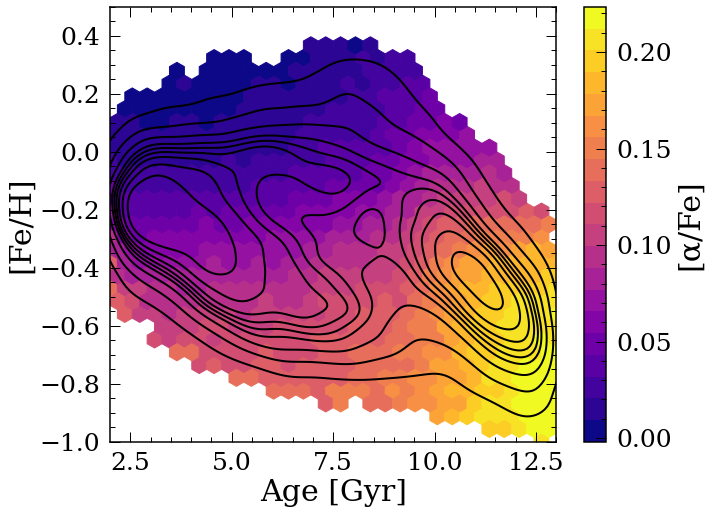

In [1009]:
plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], C=sub_tryRb['ALPHA_FE'],
          extent=(2,13,-1,0.5), gridsize=30, mincnt=50,
          cmap=plt.get_cmap('plasma',20))
plt.colorbar(label='[α/Fe]')
import seaborn as sns
sns.kdeplot(data=sub_tryRb, x="AGE", y="FEH",color='k',thresh=0.1,
           levels=10)
plt.ylabel('[Fe/H]')
plt.xlabel('Age [Gyr]')
plt.xlim([2,13])
plt.ylim([-1,0.5])

In [838]:
11/30, 1.5/30

(0.36666666666666664, 0.05)

100%|██████████| 12/12 [00:04<00:00,  2.96it/s]


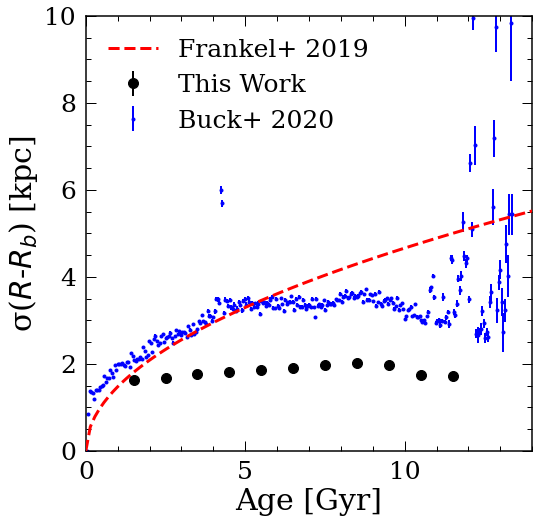

In [324]:
import astropy.uncertainty as unc

sub_tryRb['R_err'] = (sub_tryRb['PARALLAX'])**-2*(sub_tryRb['PARALLAX_ERROR'])


agebincalc_rm = np.linspace(0,12,13)
mean_dr = np.zeros(len(agebincalc_rm)-1)
mean_dr_err = np.zeros(len(agebincalc_rm)-1)

sub_tryRb['AGE_sca'] = sub_tryRb['AGE']
sub_tryRb = sub_tryRb.loc[sub_tryRb['AGE_ERR']<np.diff(agebincalc_rm)[0]]
sub_tryRb_sub = sub_tryRb
sub_tryRb_sub = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['Rb']<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['FEH']>-1]
sub_tryRb_sub = sub_tryRb_sub.loc[abs(sub_tryRb_sub['R_GUIDING']-8.2)<0.5]

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['AGE_sca']>agebincalc_rm[i])&(sub_tryRb_sub['AGE_sca']<agebincalc_rm[i+1])]
    #mean_dr[i] = np.std(sub_tryRb_sing['Rb_new']-sub_tryRb_sing['R'])    
    #mean_dr_err[i] = mean_dr[i]/(len(sub_tryRb_sing)-1)
    
    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','R_err','R_GUIDING'])
    sub_tryRb_sing = sub_tryRb_sing.loc[sub_tryRb_sing['R_err']<1]
    
    if len(sub_tryRb_sing)<30:
        mean_dr[i] = np.nan
        mean_dr_err[i] = np.nan
        continue
        
    Rbdist = unc.normal(sub_tryRb_sing['Rb'].values, 
                     std=sub_tryRb_sing['R_err'].values, 
                     n_samples=1000)
    Rdist = unc.normal(sub_tryRb_sing['R_GUIDING'].values, 
                     std=sub_tryRb_sing['R_err'].values, 
                     n_samples=1000)
    
    drdist = np.std(Rbdist-Rdist)
    
    mean_dr[i] = drdist.pdf_median()
    mean_dr_err[i] = np.median(np.sqrt(drdist.pdf_var()))
    
    
plt.figure(figsize=(8,8))
dR_sim = pd.read_pickle('BuckMigration.pkl')

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=mean_dr_err, fmt='ko', label='This Work', 
            markersize=10)
plt.plot(np.linspace(0,14,100), 
         3.9*np.sqrt(np.linspace(0,14,100)/7), 
         'r--', label='Frankel+ 2019', zorder=10,
        linewidth=3)

m = (dR_sim['NoS']>30)
plt.errorbar(dR_sim['meanage'][m], dR_sim['meandR'][m],
             yerr=dR_sim['meadR_err'][m], fmt='bo', 
             label='Buck+ 2020', markersize=3)

plt.xlim([0,14])
plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('σ($R$-$R_b$) [kpc]')
plt.legend()

plt.savefig('Figures/eps/migrationStr',bbox_inches='tight')
plt.savefig('Figures/migrationStr.png',bbox_inches='tight')

100%|██████████| 39/39 [00:00<00:00, 425.90it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


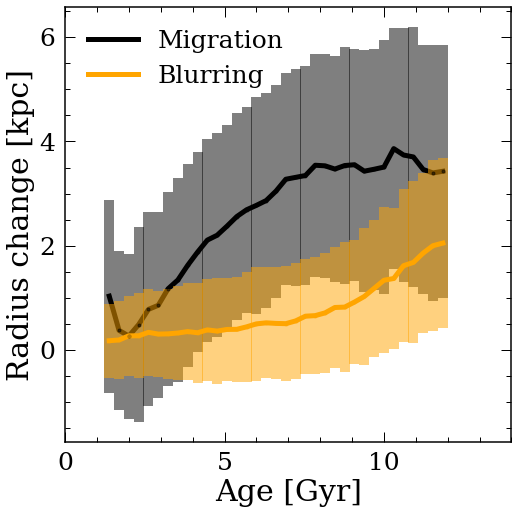

In [667]:
import astropy.uncertainty as unc

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb['AGE_sca'] = sub_tryRb['AGE']
sub_tryRb_sub = sub_tryRb
sub_tryRb_sub = sub_tryRb.loc[abs(sub_tryRb['R_GUIDING'])<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['Rb']<20]
sub_tryRb_sub = sub_tryRb_sub.loc[sub_tryRb_sub['FEH']>-1]
sub_tryRb_sub = sub_tryRb_sub.loc[abs(sub_tryRb_sub['R']-8.2)<0.5]

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['AGE']>agebincalc_rm[i])&(sub_tryRb_sub['AGE']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','R_GUIDING'])
    
    if len(sub_tryRb_sing)<30:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan
        
        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue
    
    mean_dr[i] = np.mean(sub_tryRb_sing['R_GUIDING']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['R_GUIDING']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['R_GUIDING'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['R_GUIDING'])

        
plt.figure(figsize=(8,8))

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')

plt.xlim([0,14])
#plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)

plt.savefig('Figures/eps/migrationStr',bbox_inches='tight')
plt.savefig('Figures/migrationStr.png',bbox_inches='tight')